# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. **Ваша задача — разобраться в причинах и помочь компании выйти в плюс.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

    - лог сервера с данными об их посещениях,
    - выгрузка их покупок за этот период,
    - рекламные расходы.

**Вам предстоит изучить:**

        - откуда приходят пользователи и какими устройствами они пользуются,
        - сколько стоит привлечение пользователей из различных рекламных каналов;
        - сколько денег приносит каждый клиент,
        - когда расходы на привлечение клиента окупаются,
        - какие факторы мешают привлечению клиентов.

**Описание данных**

В вашем распоряжении три датасета. 
    
        * visits_info_short.csv хранит лог сервера с информацией о посещениях сайта,
        * orders_info_short.csv — информацию о заказах,
        * costs_info_short.csv — информацию о расходах на рекламу.

**Структура visits_info_short.csv:**

        * User Id — уникальный идентификатор пользователя,
        * Region — страна пользователя,
        * Device — тип устройства пользователя,
        * Channel — идентификатор источника перехода,
        * Session Start — дата и время начала сессии,
        * Session End — дата и время окончания сессии.

**Структура orders_info_short.csv:**

        * User Id — уникальный идентификатор пользователя,
        * Event Dt — дата и время покупки,
        * Revenue — сумма заказа.

**Структура costs_info_short.csv:**

        * dt — дата проведения рекламной кампании,
        * Channel — идентификатор рекламного источника,
        * costs — расходы на эту кампанию.

# Подготовка к обработке




## Библиотеки и исходные данные (выгрузки)
Загрузим основные библиотеки, которые могут потребоваться, и отдельным блоком исходные файлы 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
from matplotlib import colors
import seaborn as sns
!pip install tabulate
from tabulate import tabulate
from scipy import stats as st
!pip install --upgrade jinja2


In [2]:
try:
    costs_main = pd.read_csv (r'C:\Users\PC_Maks\Desktop\study\Sprint 11 воронки CR\project\costs_info_short.csv',\
                              parse_dates=["dt"])
    orders_main = pd.read_csv (r'C:\Users\PC_Maks\Desktop\study\Sprint 11 воронки CR\project\orders_info_short.csv',\
                               parse_dates=["Event Dt"])
    visits_main = pd.read_csv (r'C:\Users\PC_Maks\Desktop\study\Sprint 11 воронки CR\project\visits_info_short.csv')
except:
    visits_main = pd.read_csv ('/datasets/visits_info_short.csv')
    orders_main = pd.read_csv ('/datasets/orders_info_short.csv', parse_dates=["Event Dt"])
    costs_main = pd.read_csv ('/datasets/costs_info_short.csv', parse_dates=["dt"])
    
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


### Познакомимся с данными

In [3]:
display (costs_main.shape)
display (costs_main.head ())
display (costs_main.info ())

(1800, 3)

dt   Channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

Очевыдных пропусков нет, формат заменили dt заменили на этапе выгрузки, нужно будет переименовать столбцы, и проверить на неочевидные пропуски

In [4]:
display (orders_main.shape)
display (orders_main.head ())
display (orders_main.info ())

(40212, 3)

User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

Очевыдных пропусков нет, формат заменили Event Dt заменили на этапе выгрузки, нужно будет переименовать столбцы, и проверить на неочевидные пропуски

In [5]:
display (visits_main.shape)
display (visits_main.head ())
display (visits_main.info ())

(309901, 6)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Очевыдных пропусков нет, заменим формат столбцов старта и оканчания сессиий на дату, нужно будет переименовать столбцы, и проверить на неочевидные пропуски

## Корректировка названий, регистра

In [6]:
costs_main.columns = [x.lower() for x in costs_main.columns]
orders_main.columns = [x.lower() for x in orders_main.columns]
visits_main.columns = [x.lower() for x in visits_main.columns]

In [7]:
display (costs_main.head (1))
display (orders_main.head (1))
display (visits_main.head (1))

dt   channel  costs
0 2019-05-01  FaceBoom  113.3

user id            event dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99

user id         region  device  channel        session start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session end  
0  2019-05-01 02:45:01

Проведем корректировку названий столбцов

In [8]:
orders_main.rename(columns = {'user id':'user_id', 'event dt':'event_dt'}, inplace = True )
visits_main.rename(columns = {'user id':'user_id', 'session start':'session_start',\
                              'session end':'session_end'}, inplace = True )

In [9]:
display (costs_main.head (1))
display (orders_main.head (1))
display (visits_main.head (1))

dt   channel  costs
0 2019-05-01  FaceBoom  113.3

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99

user_id         region  device  channel        session_start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session_end  
0  2019-05-01 02:45:01

первичная корректировка окончена.

### Приведем также к нижниму регистру строковые значения в наших основновных срезах, для отработки дубликатов

In [10]:
costs_main = costs_main.applymap(lambda x: x.lower() if isinstance(x, str) else x)
orders_main = orders_main.applymap(lambda x: x.lower() if isinstance(x, str) else x)
visits_main = visits_main.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [11]:
display (costs_main.head (1))
display (orders_main.head (1))
display (visits_main.head (1))

dt   channel  costs
0 2019-05-01  faceboom  113.3

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99

user_id         region  device  channel        session_start  \
0  981449118918  united states  iphone  organic  2019-05-01 02:36:01   

           session_end  
0  2019-05-01 02:45:01

Готово. Можем приступить к поиску дублей. Будем искать полные дубли.

In [12]:
print (f' Явные дублика во всех строках и столбцах {costs_main.duplicated ().sum ()}')

duplicates = costs_main.duplicated()
duplicate_rows = costs_main.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дублика во всех строках и столбцах 0
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       0 non-null      datetime64[ns]
 1   channel  0 non-null      object        
 2   costs    0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [dt, channel, costs]
Index: []


In [13]:
print (f' Явные дублика во всех строках и столбцах {orders_main.duplicated ().sum ()}')

duplicates = orders_main.duplicated()
duplicate_rows = orders_main.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дублика во всех строках и столбцах 0
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   0 non-null      int64         
 1   event_dt  0 non-null      datetime64[ns]
 2   revenue   0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 0.0 bytes
None
Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []


In [14]:
print (f' Явные дублика во всех строках и столбцах {visits_main.duplicated ().sum ()}')

duplicates = visits_main.duplicated()
duplicate_rows = visits_main.loc[duplicates]
print(duplicate_rows.info())
print(duplicate_rows)

 Явные дублика во всех строках и столбцах 0
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        0 non-null      int64 
 1   region         0 non-null      object
 2   device         0 non-null      object
 3   channel        0 non-null      object
 4   session_start  0 non-null      object
 5   session_end    0 non-null      object
dtypes: int64(1), object(5)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []


Явных дублей нет, можно переходить к следующему этапу.

### Пропуски
Проверим на наличие пропусков. Пропусков нет

In [15]:
display (costs_main.isna ().sum ())
display (orders_main.isna ().sum ())
display (visits_main.isna ().sum ())

dt         0
channel    0
costs      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

### Проведем финалную корректировку типов данных.

In [16]:
visits_main['session_start'] = pd.to_datetime(visits_main['session_start'])
visits_main['session_end'] = pd.to_datetime(visits_main['session_end'])


### Осталось проверить на выбросы и иные аномалии - costs_main

минимальное значение - 0.80, среднее - 58.61, а максимальное - 630.00 (вероятно выброс, так как слишком отличается от остальных).

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

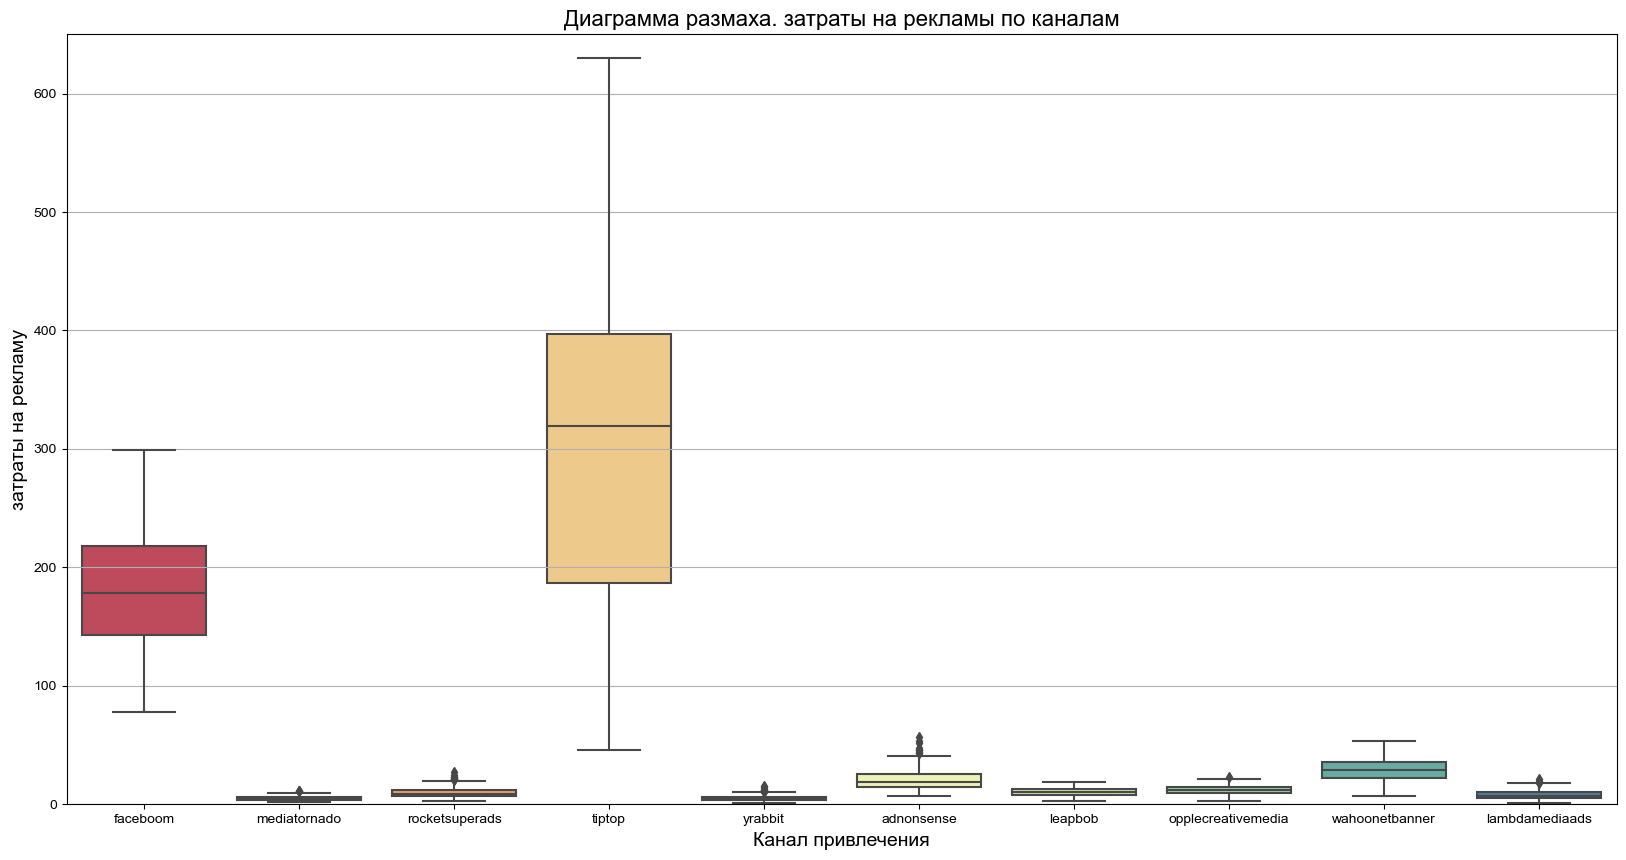

In [17]:
display(costs_main['costs'].describe())
plt.figure(figsize=(20,10))
plt.ylim (0,650)
plt.grid(axis='y', alpha=1)

sns.boxplot(x='channel', y='costs', data=costs_main, palette='Spectral')
plt.title('Диаграмма размаха. затраты на рекламы по каналам', fontsize=16)
plt.xlabel('Канал привлечения', fontsize=14)
plt.ylabel('затраты на рекламу', fontsize=14)
plt.show()

Значения особенно сильно выбиваются у канала tiptop. Посмотрим на него внимательнее и примем решение что с ним делать 

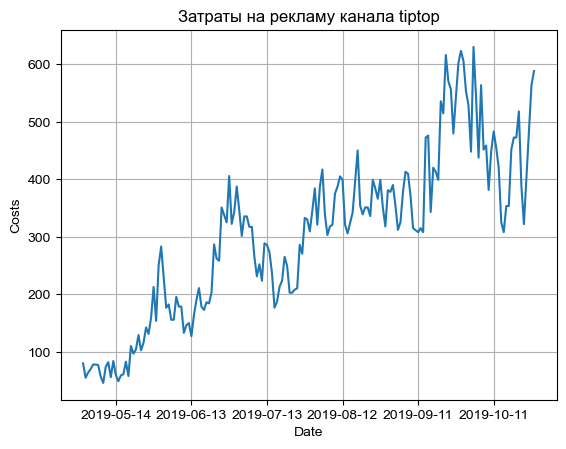

In [18]:
costs_main_tiptop = costs_main.query ('channel=="tiptop"')
costs_main_tiptop
costs_main_tiptop.value_counts ()
plt.plot(costs_main_tiptop['dt'], costs_main_tiptop['costs'])
plt.xlabel('Date')
plt.ylabel('Costs')
plt.title('Затраты на рекламу канала tiptop')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(7))
plt.grid(True)
plt.show()

Мы видим, что пиковых значений достигают зататы в сентябре 2019 года, но важно отметить, что учитывае среднее значение costs в районе 58 у.е., канал tiptop уже со второго месяца (с июня) обходится в две дороже. Держим это в голове, проанализруем в рамках следующих этапов выполнения задачи

### Осталось проверить на выбросы и иные аномалии - orders_main

минимальное значение - 4.99, среднее - 5.37, а максимальное - 49.99.00 (вероятно выброс, так как слишком отличается от остальных).

In [19]:
display(orders_main['revenue'].describe())
grouped_orders_main = orders_main.groupby('user_id')['revenue'].mean()
grouped_orders_main

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

user_id
599326          4.990000
46006712        4.990000
374052872       4.990000
414791703       4.990000
785077127       9.080909
                  ...   
999625937544    5.323333
999645428220    5.132857
999659859721    4.990000
999779032958    5.156667
999895427370    4.990000
Name: revenue, Length: 8881, dtype: float64

Предположим, что стоимость покупок 49,99 не выбросы, а стоиомсть какого-то из продуктов компании, тогда таких покупок должно быть не 1 десяток, что будет косвенно указывать на установленную ценну, а также нужно проверить какой следующий шаг в ценнике после 49,99

*результаты* 
Таких покупок 212 - явно не единичная ситуация, несмотря на то, что всего записией 40212. Следующий шаг в заказах начинается от 19,99, учитывая это, пока примнимаю как допущение 49,99 - это стоимость одного из продуктов.

In [20]:
top = orders_main.query ('revenue==49.99')

display (top.count ())

without_top = orders_main.query ('revenue<49.99')
display (without_top.describe ())

user_id     212
event_dt    212
revenue     212
dtype: int64

user_id                       event_dt       revenue
count  4.000000e+04                          40000  40000.000000
mean   4.989628e+11  2019-08-18 22:18:08.488075264      5.134125
min    5.993260e+05            2019-05-01 00:28:11      4.990000
25%    2.510164e+11            2019-07-10 20:49:39      4.990000
50%    4.981751e+11     2019-08-24 16:11:35.500000      4.990000
75%    7.432789e+11  2019-09-30 06:02:25.750000128      4.990000
max    9.998954e+11            2019-10-31 23:56:56     19.990000
std    2.861128e+11                            NaN      1.177662

### Дополнительные проверки (отработка аномалий во времени, недопустимых числовых значений)

In [21]:
display (costs_main.describe ())
display (orders_main.describe ())
# отрицательных значений нет

dt        costs
count                           1800  1800.000000
mean   2019-07-29 12:00:00.000000256    58.609611
min              2019-05-01 00:00:00     0.800000
25%              2019-06-14 18:00:00     6.495000
50%              2019-07-29 12:00:00    12.285000
75%              2019-09-12 06:00:00    33.600000
max              2019-10-27 00:00:00   630.000000
std                              NaN   107.740223

user_id                       event_dt       revenue
count  4.021200e+04                          40212  40212.000000
mean   4.990295e+11  2019-08-18 21:31:11.158037504      5.370608
min    5.993260e+05            2019-05-01 00:28:11      4.990000
25%    2.511324e+11  2019-07-10 20:15:34.249999872      4.990000
50%    4.982840e+11            2019-08-24 15:15:30      4.990000
75%    7.433327e+11     2019-09-30 05:24:46.500000      4.990000
max    9.998954e+11            2019-10-31 23:56:56     49.990000
std    2.860937e+11                            NaN      3.454208

In [22]:
visits_main_anomaly= visits_main.query ('session_start>session_end')
visits_main_anomaly

# Аномального обратного времени нет

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

**Итог**

Данные в общем и целом не имеют критичных проблем (пропусков, и не отрабатываемых значений), после корректировок стилистики в названиях столбцов, а также при допущении, что выявленный значения цены в 49,99 - это реальная стоиомсть какого-то продукта/услуги, можно переходить к следующим этапам анализа. Датасет готов к работе.

# Создадим функции для дальнейшей работы (скопируем ранее подготовленные в рамках теории)))) )

## Функция для создания профилей

In [23]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts']
    profiles['dt'] = pd.to_datetime(profiles['dt'])

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # скорректируем тип данных в новой таблице - new_users
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

## Функция для расчета удержания/для подсчёта Retention Rate

In [24]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

## Функция для расчета конверсии/для подсчёта конверсии

In [25]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

## Функция для расчета ROI и LTV

In [26]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Функция для сглаживания фрейма

In [27]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Функция визуализации удержания 

In [28]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

## Функция для визуализации конверсии

In [29]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Фунцкция для визуализации LTV и ROI 

In [30]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(fontsize=14)
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(fontsize=14)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(fontsize=14)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=14)
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(fontsize=14)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Анализ

## Сформирум профили пользователей

In [31]:
profiles = get_profiles(visits_main, orders_main, costs_main)
print(profiles.head(5)) 
profiles ['channel'].value_counts ()

    user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    faceboom     mac  united states 2019-05-07   
1   4919697 2019-07-09 12:46:07    faceboom  iphone  united states 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iphone         france 2019-10-01   
3  22593348 2019-08-22 21:35:48  adnonsense      pc        germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     yrabbit  iphone  united states 2019-10-02   

                month  payer  acquisition_cost  
0 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 12:46:07  False          1.107237  
2 2019-10-01 09:58:33  False          0.000000  
3 2019-08-22 21:35:48  False          0.988235  
4 2019-10-02 00:07:44  False          0.230769  


channel
organic               56439
faceboom              29144
tiptop                19561
opplecreativemedia     8605
leapbob                8553
wahoonetbanner         8553
rocketsuperads         4448
mediatornado           4364
yrabbit                4312
adnonsense             3880
lambdamediaads         2149
Name: count, dtype: int64

## Установим момент и горизонт анализа данных, максимальную и минимальные даты
Нам предоставленны данны с 1 по 27 октября 2019 года, и зададим недельный горизонт анализа.
мин и макс проверим на всякий случай.

*совпали с установочными*


In [32]:
observation_date = datetime(2019, 10, 27).date()  # момент анализа
horizon_days_7 = 7  # горизонт анализа 7 дней
horizon_days_14 = 14 # горизонт анализа 14 дней

min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
display ('Минимальная дата привлечения пользователей:', profiles['dt'].min())
display ('Максимальная дата привлечения пользователей:', profiles['dt'].max())

'Минимальная дата привлечения пользователей:'

Timestamp('2019-05-01 00:00:00')

'Максимальная дата привлечения пользователей:'

Timestamp('2019-10-27 00:00:00')

## Проверим канал прихода пользователей и какими устройствами они пользуются

In [33]:
def stat_bar(data, column_group_1, column_group_2):
    try:
        plt.style.use('seaborn-muted')
        draw_plot = data.groupby(column_group_1)[column_group_2]
        draw_plot_calculated = draw_plot.count().sort_values()
        plot = draw_plot_calculated.plot(kind='bar', grid=True, figsize=(7,4))
        plt.title('Расчет привелчения по {}'.format(column_group_1), fontsize=16, fontweight='bold')
        plt.xlabel('Канал', fontsize=14)
        plt.ylabel('Количество клиентов', fontsize=14)
        plt.xticks(rotation=45)
        plt.rcParams['font.family'] = 'Arial'
        plt.show()
    except:
        raise ValueError('Проверь данные')


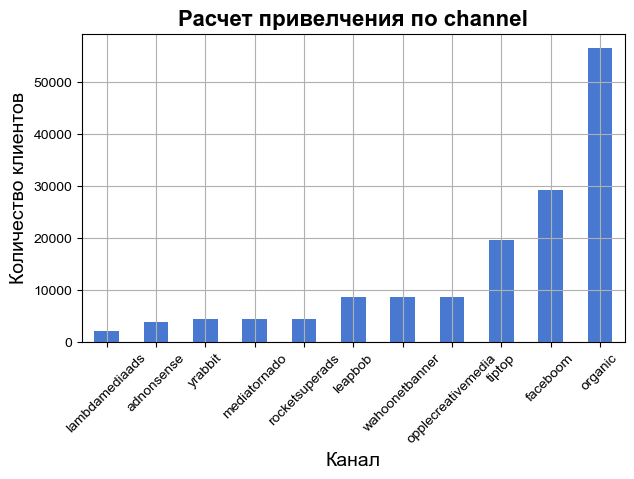

In [34]:
stat_bar (profiles, column_group_1='channel', column_group_2='user_id')

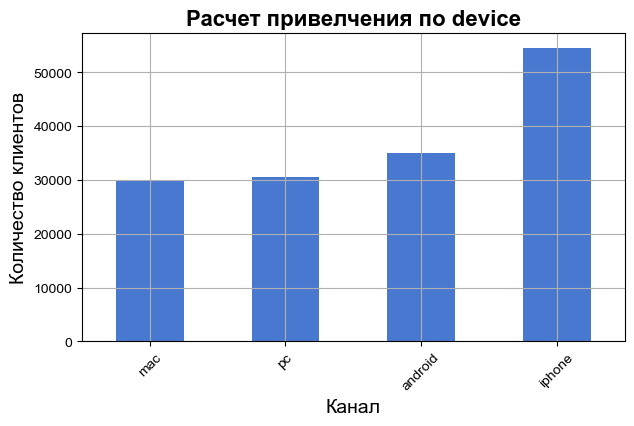

In [35]:
stat_bar (profiles, column_group_1='device', column_group_2='user_id')

**На случай если "откуда" имеется в виду страна, произведем еще и группиование по страннам.**

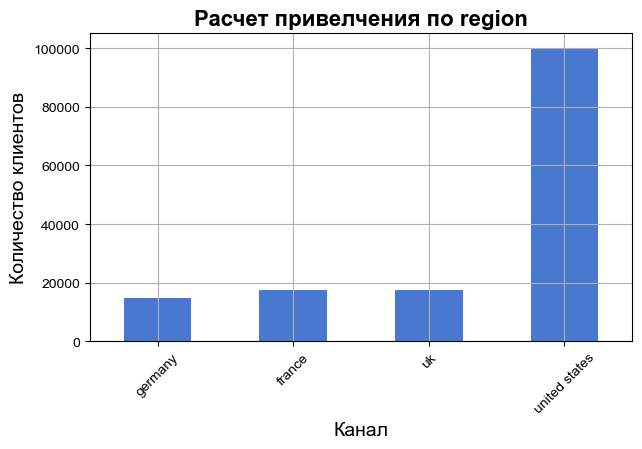

In [36]:
stat_bar (profiles, column_group_1='region', column_group_2='user_id')

**Комментарий по каналам привлечения и устройствам**

Как видим на графиках основной источник привлечения клиенто - Organic, клиенты сами находят приложение, основные устройства пользователей Айфоны и Андройд, а подавляющее большенство из США

### Для подкрепления визуальной части еще  цифрами, произведем расчет в количестве и процентах

In [37]:
region_users = (
    profiles
    .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )
region_users

In [38]:
channel_users = (
    profiles
    .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )
channel_users

In [39]:
device_users = (
    profiles
    .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )
device_users

**Промежуточный вывод**

Можно отметить, что в цифрах данные немного скорректированны. Регионы представленния продукта компании - США, Англия, Франция и Германия. Больше всего пользователей из США - 100002.
По каналам - основной источник привлечения новых пользователей (где используется платная реклама) - faceboom (29144) и tiptop (19561), но как отмечали ранее реклама на tiptop аномально высокая (коррупция?)))))
По устройствам: основновной поток пользователей заходит с устройств iphone (54479) и android (35032), но лучшие показатели в части платтежей у пользователей mac, на втором месте iphone

## Стоимость привлечения пользователей из различных рекламных каналов (CAC, ROI, LTV)

### Для расчетов необходимо добавить максимальную и минимальную дату наблюдений, а также расчитать CAC по дням и каналам 

In [40]:
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []


### Обработка ДФ profiles для анализа платного трафика
Отфильтруем нашу таблицу с пользователями по категории плательщиков, исключим тех кто пришел сам, так как нам необходимо провести исследование платного трафика.

In [41]:
profiles = profiles.query ('channel !="organic"')
profiles.head ()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    faceboom      mac  united states   
1   4919697 2019-07-09 12:46:07    faceboom   iphone  united states   
3  22593348 2019-08-22 21:35:48  adnonsense       pc        germany   
4  31989216 2019-10-02 00:07:44     yrabbit   iphone  united states   
7  46006712 2019-06-30 03:46:29  adnonsense  android         france   

          dt               month  payer  acquisition_cost  
0 2019-05-07 2019-05-07 20:58:57   True          1.088172  
1 2019-07-09 2019-07-09 12:46:07  False          1.107237  
3 2019-08-22 2019-08-22 21:35:48  False          0.988235  
4 2019-10-02 2019-10-02 00:07:44  False          0.230769  
7 2019-06-30 2019-06-30 03:46:29   True          1.008000

##### При формировании profiles был создан столбец acquisition_cost, в котором отражена стоимость рекламы на привлеченного пользователя, посчитаем сколько всего было потрачено на всю рекламу за период - 105497.3

In [42]:
adver_sum = profiles ['acquisition_cost']. sum ()
adver_sum

105497.3

#### Распределение трат по рекламным источникам.

Каналы tiptop и faceboom являются явными лидерами по расходам на рекламу

In [43]:
all_cost =(
    profiles.groupby ('channel')
    .agg ({'acquisition_cost':'sum'})
    .sort_values (by='acquisition_cost', ascending=False)
    .rename (columns={'acquisition_cost': 'total_cost_channel'})
    .reset_index ()
)


all_cost 

channel  total_cost_channel
0              tiptop            54751.30
1            faceboom            32445.60
2      wahoonetbanner             5151.00
3          adnonsense             3911.25
4  opplecreativemedia             2151.25
5      rocketsuperads             1833.00
6             leapbob             1797.60
7      lambdamediaads             1557.60
8        mediatornado              954.48
9             yrabbit              944.22

In [44]:
all_cost['ratio_cost'] = all_cost['total_cost_channel'] / costs_main['costs'].sum() * 100
all_cost = all_cost.style.format({'total_cost_channel':'{:.2f}','ratio_cost': '{:.2f}%'})

all_cost

Каналы tiptop и faceboom являются явными лидерами по расходам на рекламу, в процентном соотношении на них приходится более 82% всего бюджета.
Самые низкие расходы по 0.90% от общей суммы, на каналы mediatornado (954.48) и yrabbit (944.22).

#### Визуализация динамики расходов на рекламу во времени.
Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику на одном граифике.
ДЛя начала добавим данные, которые потребуются для анализа во времени - недели и месяцы.

In [45]:
costs_main ['week']=pd.to_datetime (costs_main['dt']).dt.isocalendar().week
costs_main ['month']=pd.to_datetime (costs_main['dt']).dt.month 
costs_main

dt         channel  costs  week  month
0    2019-05-01        faceboom  113.3    18      5
1    2019-05-02        faceboom   78.1    18      5
2    2019-05-03        faceboom   85.8    18      5
3    2019-05-04        faceboom  136.4    18      5
4    2019-05-05        faceboom  122.1    18      5
...         ...             ...    ...   ...    ...
1795 2019-10-23  lambdamediaads    4.0    43     10
1796 2019-10-24  lambdamediaads    6.4    43     10
1797 2019-10-25  lambdamediaads    8.8    43     10
1798 2019-10-26  lambdamediaads    8.8    43     10
1799 2019-10-27  lambdamediaads   12.0    43     10

[1800 rows x 5 columns]

*соберем функцию для выведения графиков*


In [46]:
def stat_plot_cost(data, column_group):
    try:
        fig, ax = plt.subplots(ncols=len(column_group), figsize=(20,10))
        plt.style.use('seaborn-muted')
        
        for i, col in enumerate(column_group):
            data_group = data.pivot_table(
                index=col,
                columns='channel',
                values='costs',
                aggfunc='sum'
            )
            data_group.plot(grid=True, ax=ax[i])
            ax[i].set_xlabel('По {}'.format(col), fontsize=14, fontweight='bold')
            ax[i].set_ylabel('Расходы на рекламу')
            ax[i].set_title('Динамика расходов по {} по каждому источнику'.format(col), fontsize=16, fontweight='bold')
            plt.rcParams['font.family'] = 'Arial'
        plt.show()
    except:
        raise ValueError('Проверь данные')


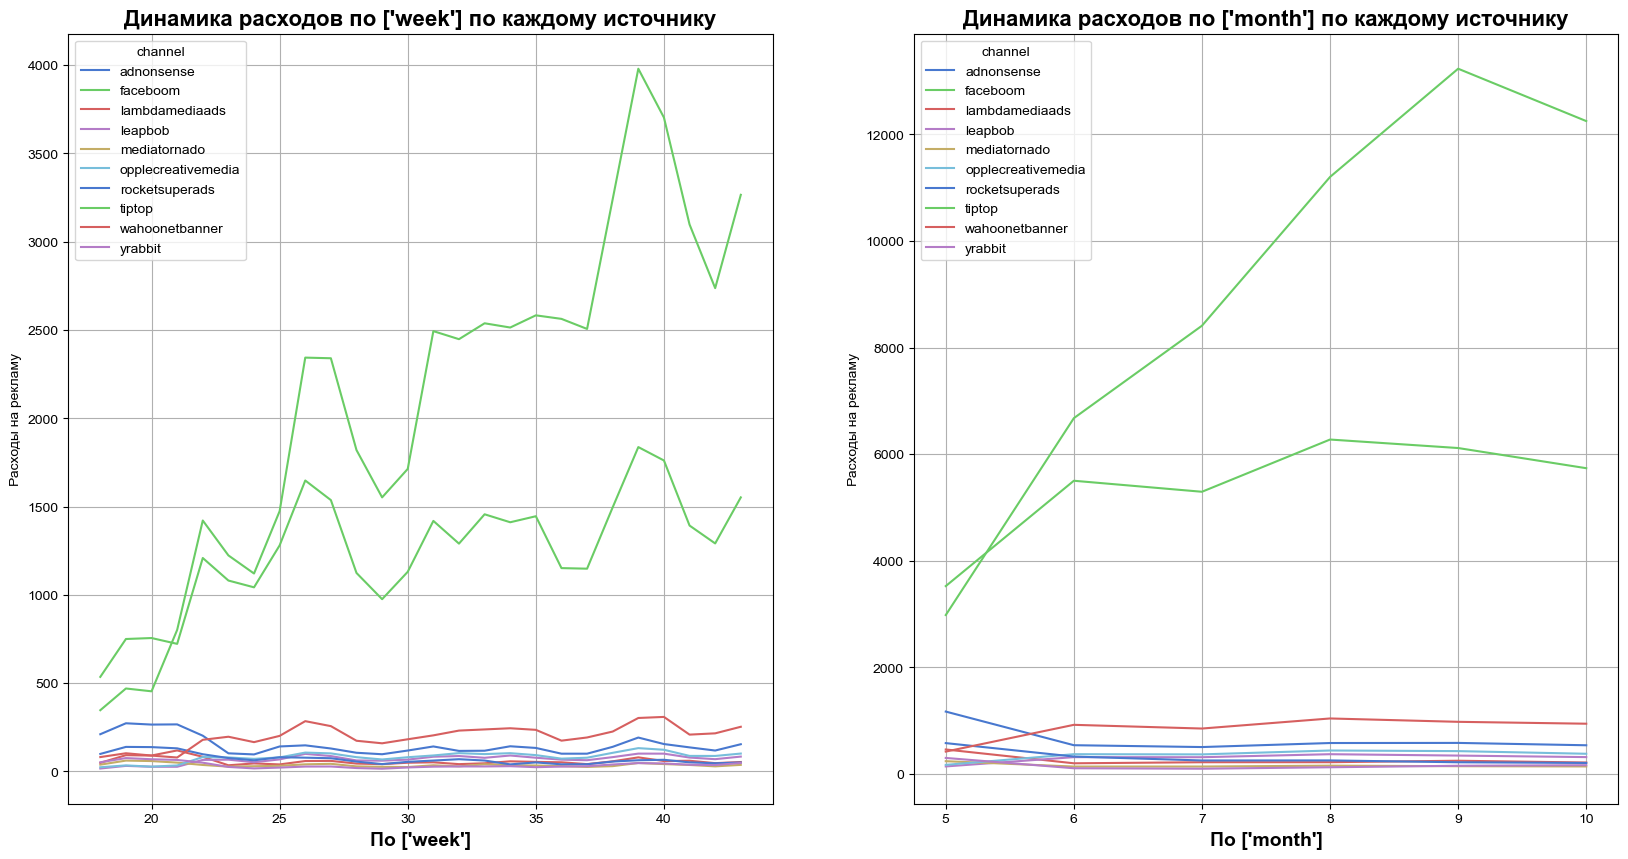

In [47]:
stat_plot_cost (costs_main, column_group=[['week'], ['month']])

По графикам видим, что расходы на рекламы через каналы tiptop и faceboom значительно больше чем по остальным каналам. Пики приходятся на 38-39 неделю/сентябрь. Эту картину мы уже отмечали при анализе выброс, там данный тренд был отмечен по компании tiptop. 
Стоит отметить, что начиная с 40-ой недели или октября соответсвенно, расходы снижались, однако к последней анализируемой неделе, опять пошли вверх.
Одновременно, мы наблюдаем более равномерное распределение расходов по каналу faceboom, изначальный рост с мая по июнь, сменяется на более плавный рост в последующие периоды, что может указывать на корректировку расходов в период с мая по момент фиксации результатов.
По соатльным каналам расходы примерно равны, с незначительными колебаниями, можно отметить расходы на канал wahoonetbanner, начиная с июня они немного больше чем на остальные каналы их низа топа. 

#### Расчет CAC.
Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [48]:
channel_cac = (
    profiles
    .groupby ('channel')
    .agg ({'acquisition_cost':'mean'})
    .sort_values (by='acquisition_cost', ascending = False)
    .rename (columns={'acquisition_cost':'avg_cac'})
    .reset_index ()
)
channel_cac = channel_cac.style.format({'avg_cac':'{:.2f}'})
channel_cac 

Самая высокая стоимость привлечения одног клиента в канале tiptop - 2,80, второе и третье место faceboom и adnonsense соответсвенно (1,11 и 1,01), самая низкая через leapbob, mediatornado и yrabbit - 0,21, 0,22 и 0,22 соответсвенно. Вновь tiptop в лидерах по расходам.

Посмотрим на расходы динамике, строить функцию не буду, так как вызываем только 1 раз расчет. 

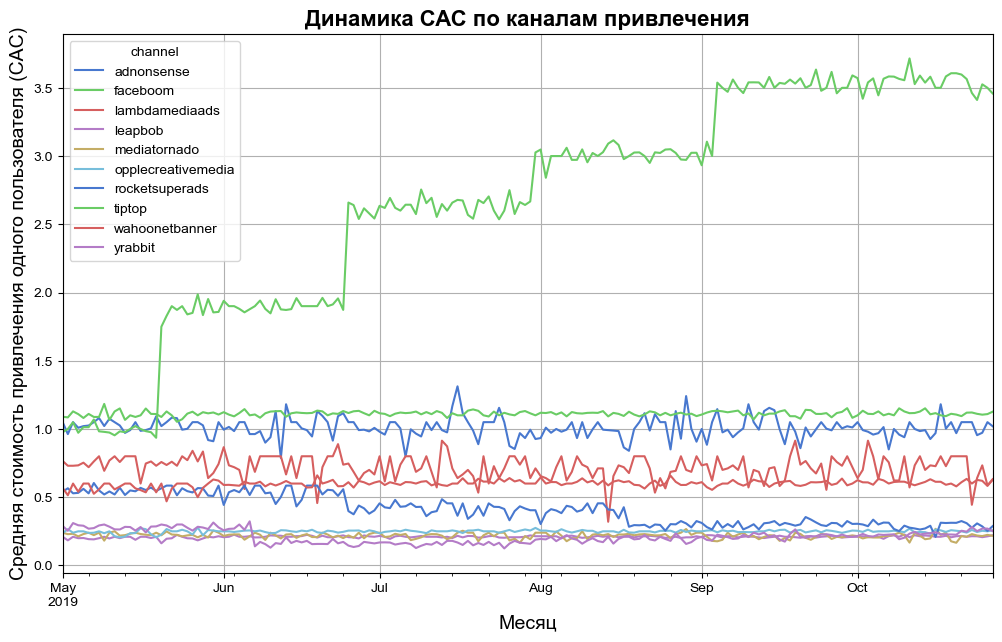

In [49]:
plt.style.use('seaborn-muted')
profiles.pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='mean'
).plot(figsize=(12, 7), grid=True)
plt.ylabel('Средняя стоимость привлечения одного пользователя (CAC)', fontsize=14)
plt.xlabel('Месяц', fontsize=14)
plt.title('Динамика САС по каналам привлечения', fontsize=16, fontweight='bold')
plt.rcParams['font.family'] = 'Arial'
plt.show()


Интересно получается. Изначально канал tiptop стоил около 1 у.е. в среднм, но начиная с середины мая с шагом примерно 35 дней мы наблюдаем значительный рост от 0,5 до 1 у.е. в каждый шаг, вплоть до 3.5 у.е.


Посмотрим на среднестатистические расходы САС без канала tiptop, и только по нему

In [50]:
profiles_without_tiptop = profiles.query ('channel != "tiptop"')
display (profiles_without_tiptop ['acquisition_cost'].mean ())
profiles_tiptop = profiles.query ('channel == "tiptop"')
display (profiles_tiptop ['acquisition_cost'].mean ())

0.6856826289049833

2.799003118449977

Без лидера по расходам (tiptop) на остальных каналах расход соствляет около 0,68 у.е. за одного клиента, и в канале tiptop - 2,80 - разница 4 раза, канал далек от выгодного способа привлечения

## Оценка окупаемости рекламы

**Вводные:**
Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.


**Сделаем небольшое резюме:**

**1.** Общие расходы на оплату рекламы составили - 105497.3

**2.** По каналам расходы распределены следующим образом:
            1.Лидеры:
                - tiptop (54751.30) - 51.90%
                - faceboom (32445.60) -	30.75%
            2. "Антилидеры":
                - mediatornado (954.48) - 0.90%
                - yrabbit (944.22) - 0.90%
                
**3.** Средняя стоиомость привлечения 1 клиента: 
             - Без лидера по расходам (tiptop) - 0,68 у.е.
             - в канале tiptop - 2,80
             
**4.** Пики расходов на рекламу приходятся на 38-39 неделю/сентябрь. Стоит отметить, что начиная с 40-ой недели/октября, расходы снижались, однако к последней анализируемой неделе октября, опять пошли вверх. Одновременно, мы наблюдаем более равномерное распределение расходов по каналу faceboom, изначальный рост с мая по июнь, сменяется на более плавный рост в последующие периоды, что может указывать на корректировку расходов в период с мая по момент фиксации результатов. По остальным каналам расходы примерно равны, с незначительными колебаниями, можно отметить расходы на канал wahoonetbanner, начиная с июня они немного больше чем на остальные каналы их низа топа.
     
**5.** Изначально привлечение через канал tiptop обходилось в среднем около 1 у.е. за 1 клиента, но начиная с середины мая, с шагом примерно 35 дней, мы наблюдаем значительный рост от 0,5 до 1 у.е. в каждый шаг, вплоть до 3.5 у.е
     
**6.** Самая низкая стоиомсть привлечения клиентов через каналы: leapbob, mediatornado и yrabbit - 0,21, 0,22 и 0,22 соответсвенно

Дополним анализ расчетами

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

In [51]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders_main,\
                                                      observation_date, horizon_days_14,dimensions=[],ignore_horizon=False)

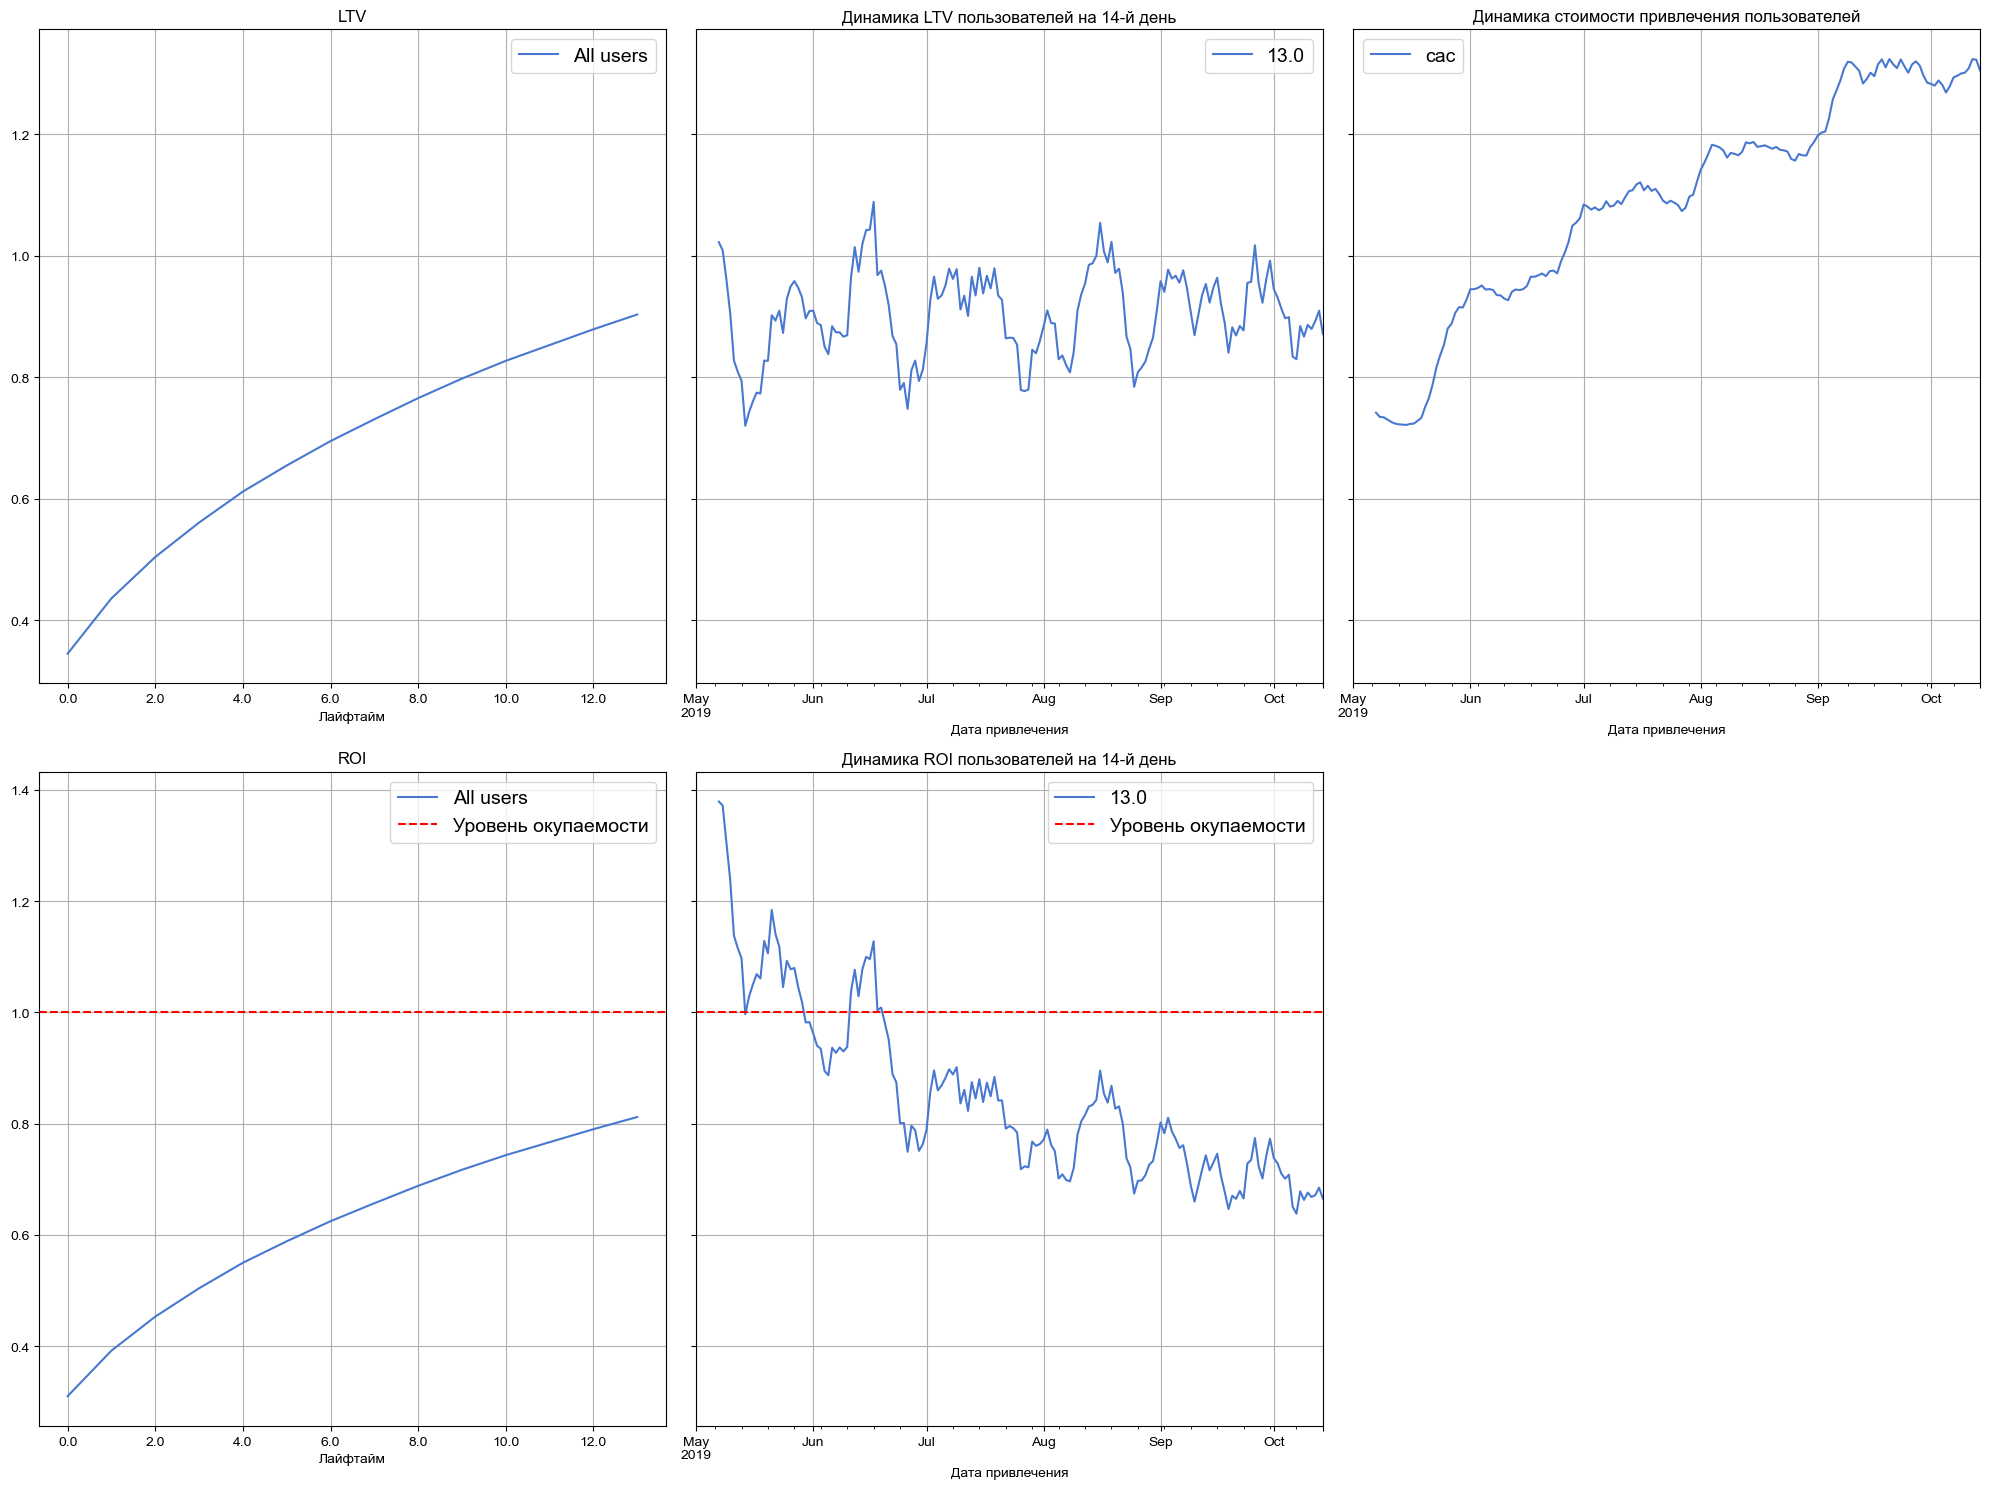

In [52]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

**Что можно отметить** динамика LTV сохраняется примерно в одном диапазоне, а вот САС все время растет, таким образом с ростом инвестиций в рекламу нет роста доходности с одного клиента, а если взглянуть на график ROI мы видим что до границы окупаемости и вовсе не доходит, т.е. компания тратит на рекламу значительно больше чем получает в итоге с нее. При этом начиная с 3 декады июня уровень окупаемоти инвестиций вовсе уходит ниже границы окупаемости и больше не пересекает ее (в этот период произошло очередное повышение роста стоиомости рекламы на через канал tiptop до 2,6 у.е. за клиента).

На текущем этапе можно сделать обоснованный вывод, что на окупаемость сильно повлияло увеличение расходов на дорогой источник новых клиентов - tiptop, а учитывая LTV стоит подумать над повышением доходности от каждого привлеченного клиента (акции, расширение продуктовой линейки)



### Конверсия пользователей и динамика её изменения. Конверсия пользователей и динамика удержания пользователей. 

In [53]:
retention_raw, retention, retention_history = get_retention(profiles, visits_main, observation_date,\
                                                               horizon_days_14, dimensions=[], ignore_horizon=False)

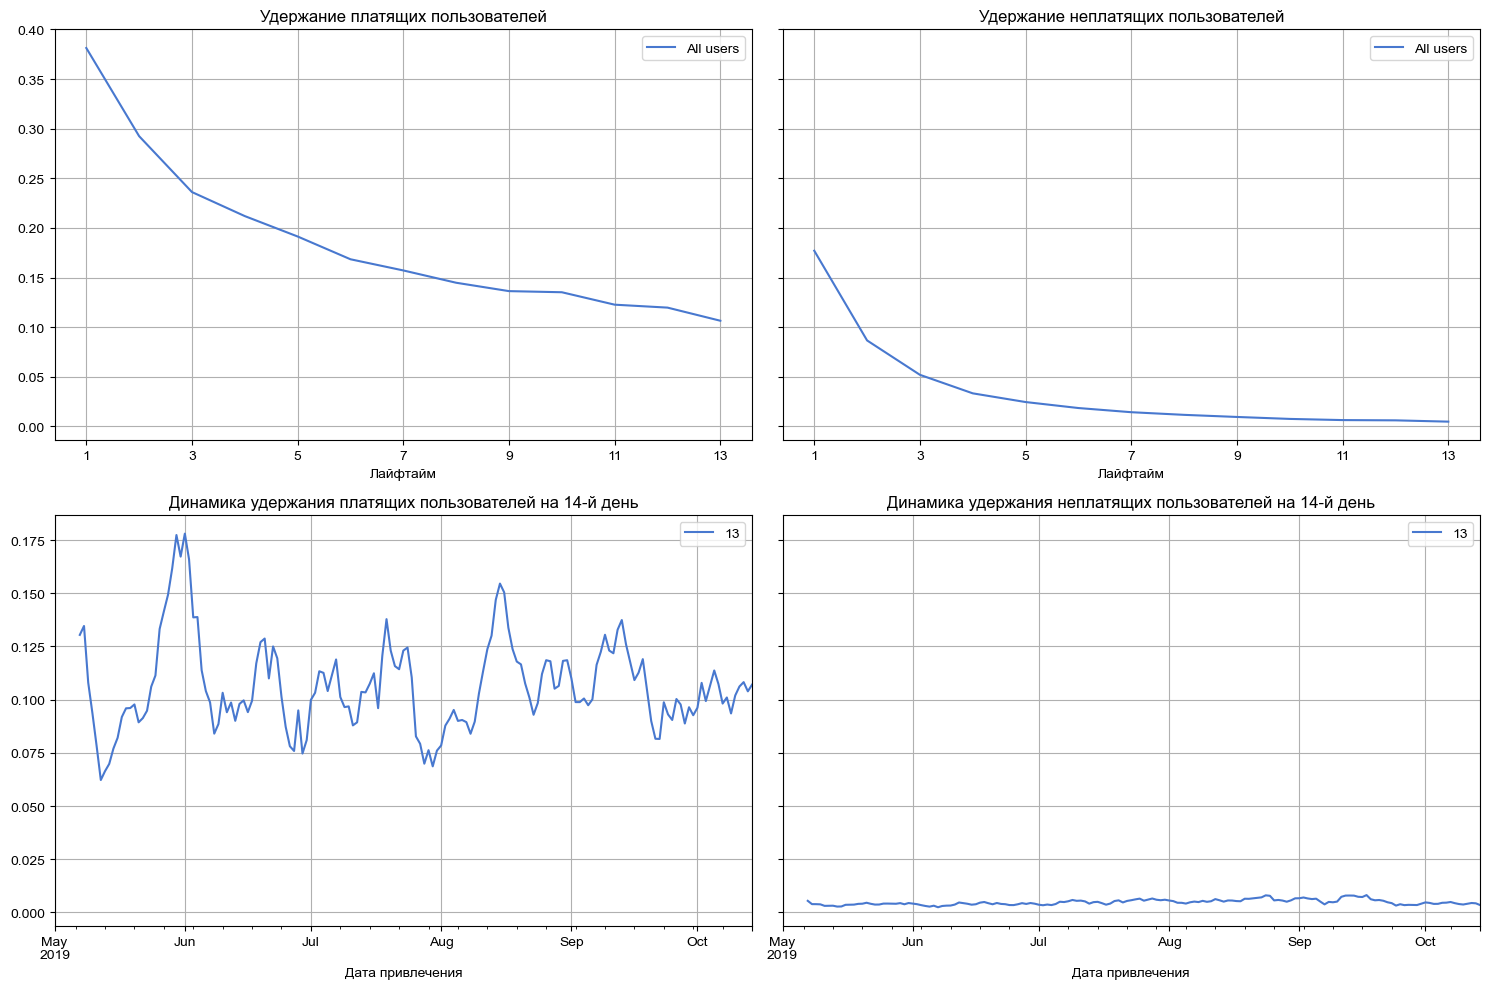

In [54]:
plot_retention(retention, retention_history, horizon_days_14, window=7)

**Выводы** 

1. Как можем увидеть на графике удержания платящих пользователей, он в срезе 14-ти дней снижается с почти 0,37 до 0,11, без выхода на однородное плато. Что отчасти хорошо, так как является естесвенным снижением, в части равномерности падения удержания. Но при этом плохо, так как из всех привлеченных клиентов только около 11% остаются с компанией
2. график удержания неплатящих клиентов - ожидаемый, резкое падение на второй день, с последующим выходом к значению близкому к нулю.
3. Интересный момент в динамике удержания - пик в июне.


In [55]:
conversion_raw, conversion, conversion_history = get_conversion(profiles,orders_main, observation_date,\
                                                                horizon_days_14,dimensions=[], ignore_horizon=False)

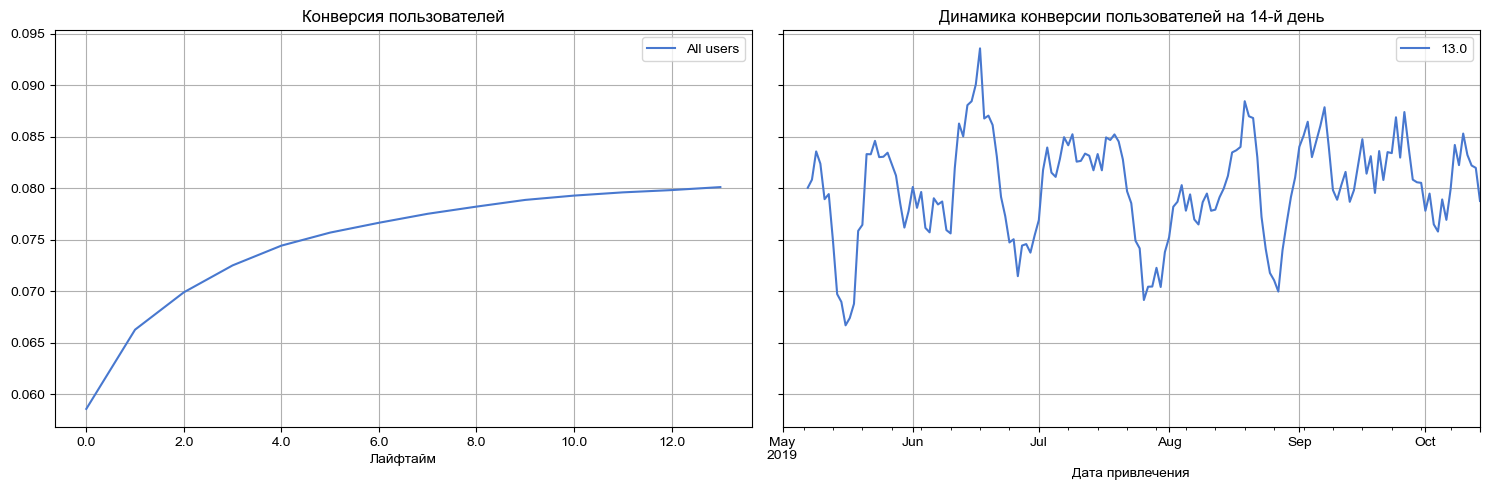

In [56]:
plot_conversion(conversion, conversion_history, horizon_days_14, window=7)

**Вывод**

1. Рост конверсии заментно останавливается на 10-ый день, и дальше практически перестает рости.
2. Динамика конверсии очень неоднородна, в октябре в диапазоне 8%-8.5%

### Анализ окупаемости рекламы с разбивкой по устройствам. 
Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [57]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders_main, observation_date, horizon_days_14,\
                                                      dimensions=['device'],ignore_horizon=False)

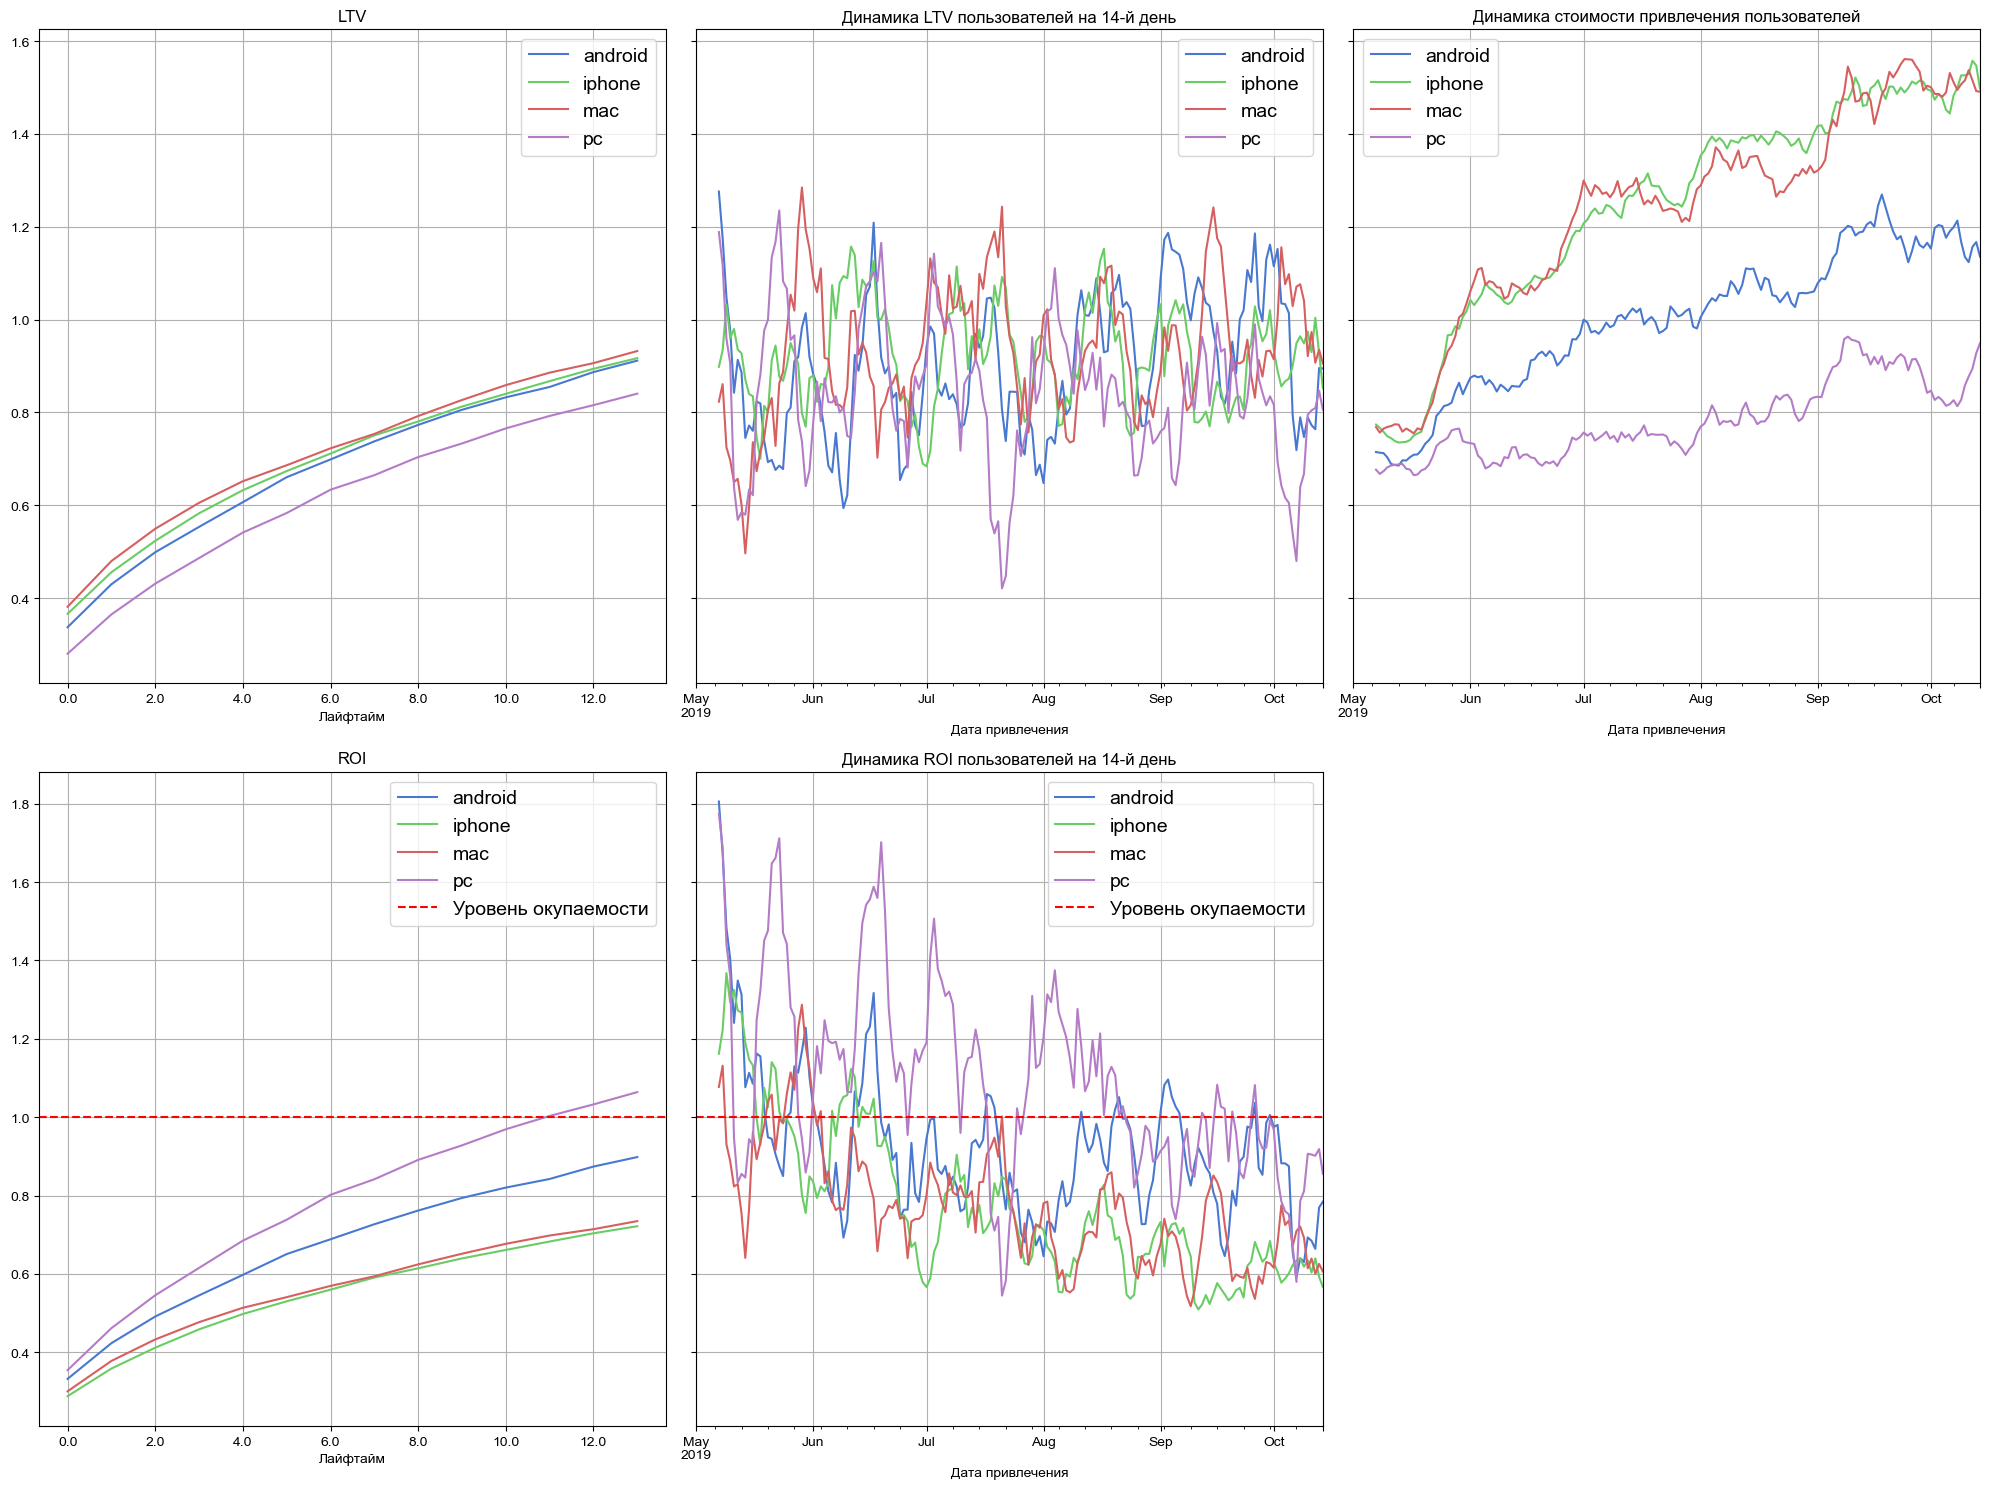

In [58]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

**Вывод**

1. Самая высокая доходность от пользователей устройств MAC, но не сильно больше пользоватлей Iphone и android, а вот пользователи PC отстают от указанной выше группы почти на 0,1. Из общего - стабильность.
2. Привлечение пользоватлей Iphone и MAC обходится дороже всего, а вот пользоватлеи PC обходятся компании значительно меньше, При этом пользователи PC не перешли границу в 1, и имеют более плавную динамику роста стоимости, в отличии от владельце продукции apple, которые "дорожают" с регулярной стабильностью, и на моент анализа стремятся к 1,6
3. По факту границу окупаемости пересекли только пользователи PC, несмотря на общую тенденцию по снижению окупаемости расходов на рекламу, и пользователи mac и iphone опять в антирейтинге, так как у них самая низкая окупаемость 

Возможно стоит обратить внимание на концепцию работы с пользователями PC, и если даже не брать только их в фокус, стоит сравнить работу с данными клиентами и владельцами других платформ?

Для полноты картины, посмотрим на ретеншен с разбивкой по устройствам.

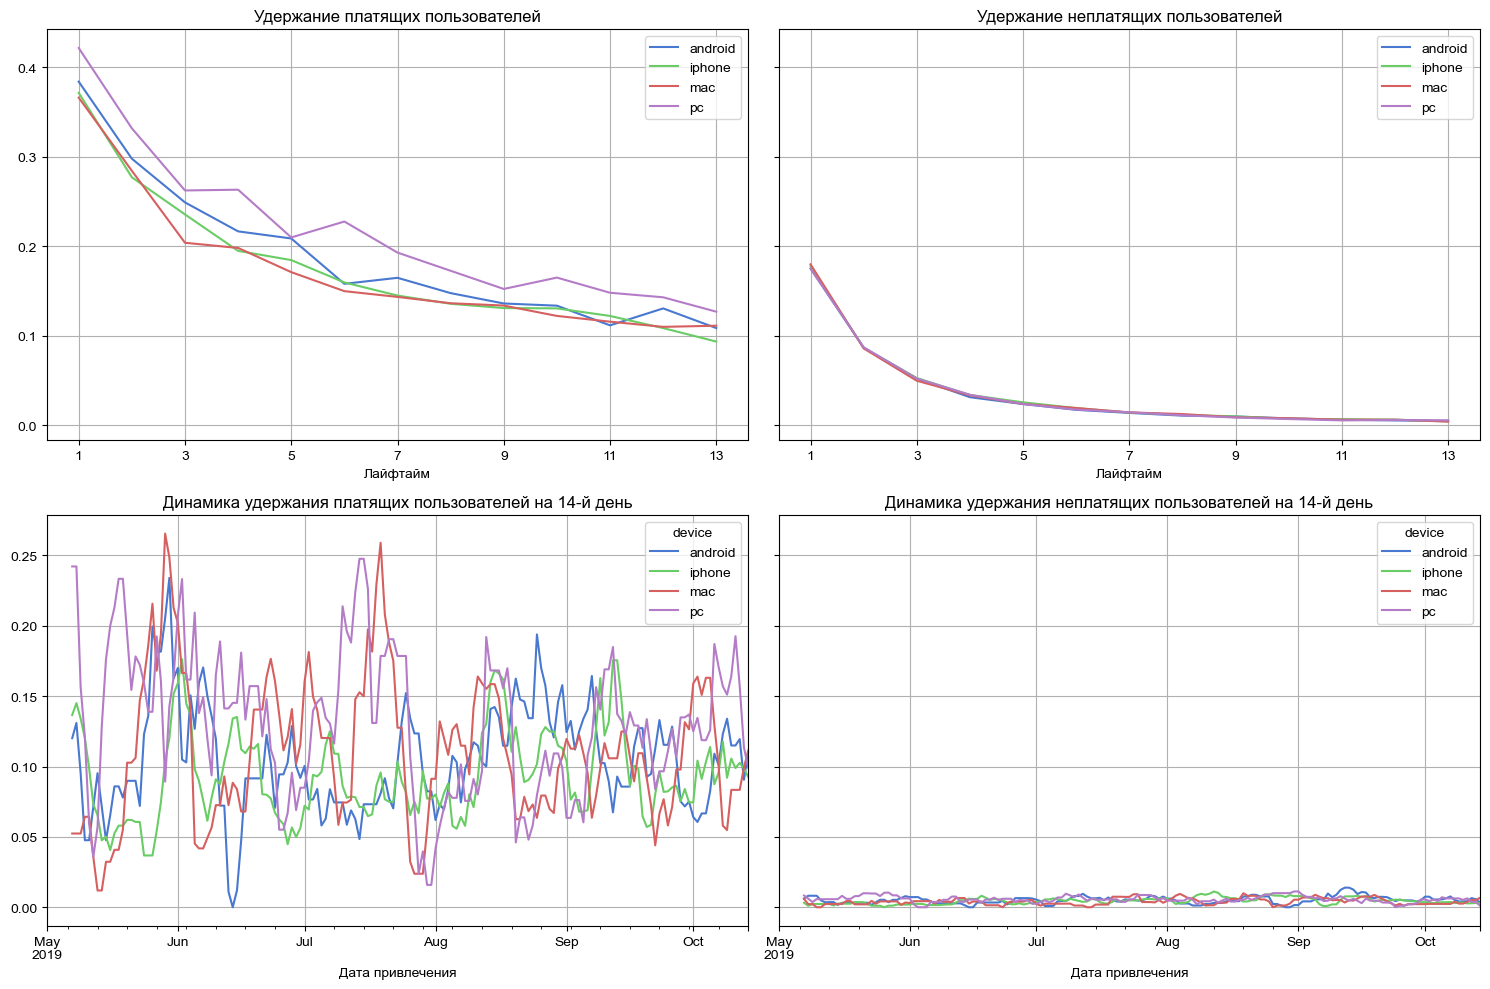

In [59]:
retention_raw, retention, retention_history = get_retention(profiles, visits_main, observation_date,\
                                                               horizon_days_14, dimensions=['device'], ignore_horizon=False)
plot_retention(retention, retention_history, horizon_days_14, window=7)

Удержание владельцем стационарных компьютеров немного лучше чем остальных

### Анализ окупаемости рекламы с разбивкой по странам. 
Повторим ранее проведенные процедуры, только добавим параметр страны

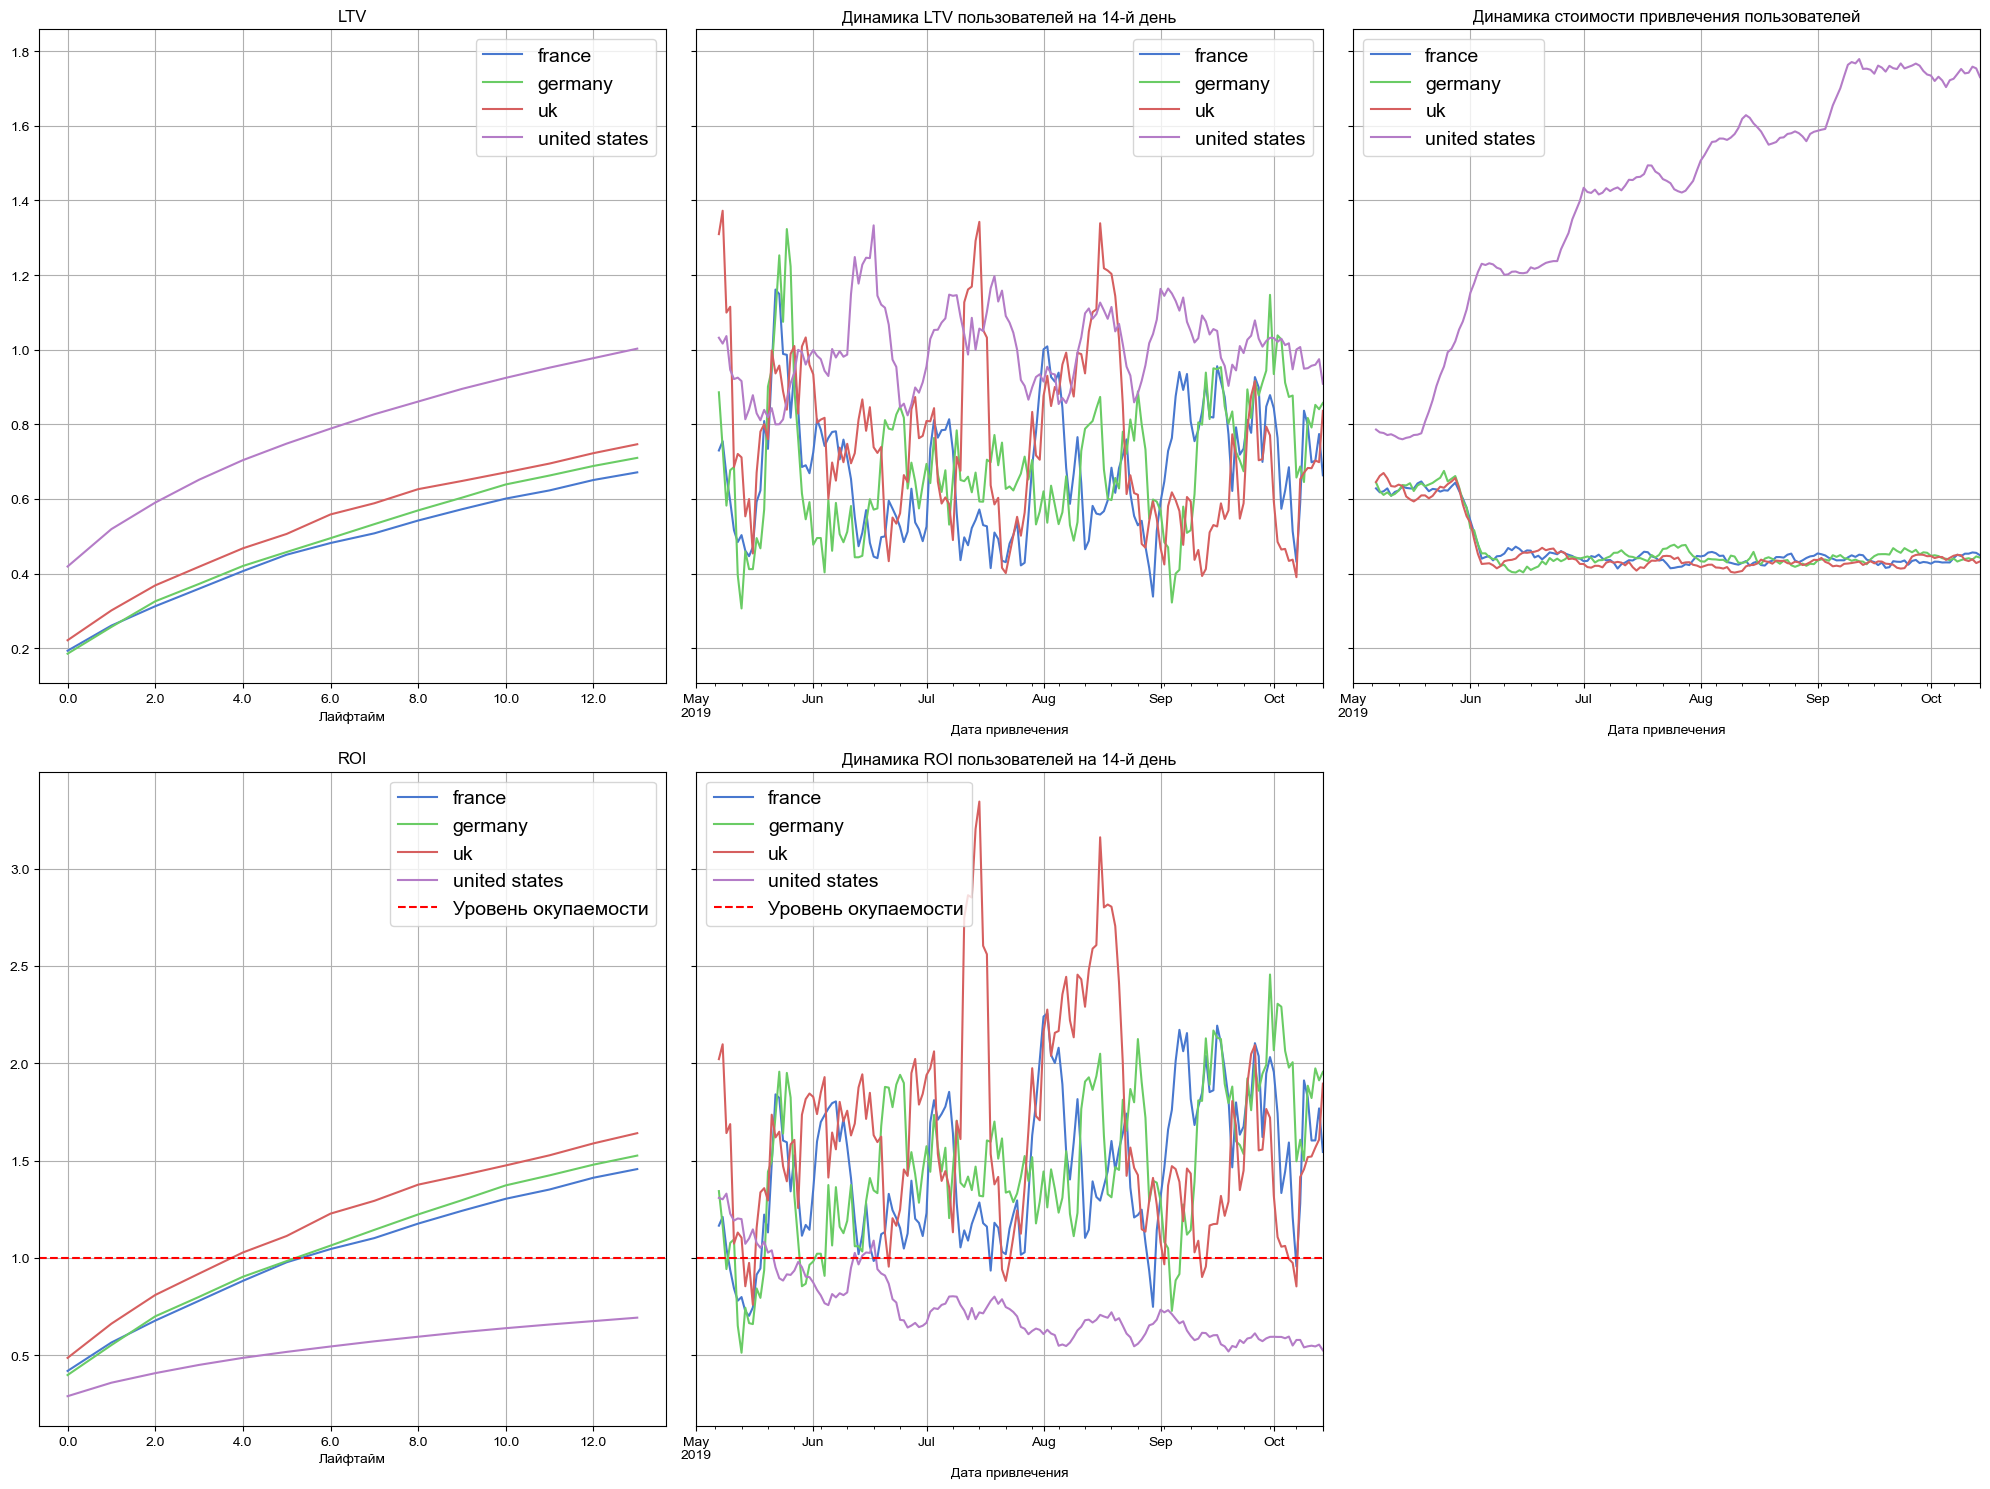

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders_main, observation_date, horizon_days_14,\
                                                      dimensions=['region'],ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

**Выводы**

1. Самая высокая доходность от пользоватлей из США, остальные странны примерно на одном уровне. 
2. Необычная картина в динамике стоимости привлечения пользователей по регионам, с середины мая резко снижается стоимость привлечения пользователей из Франции, Германии и Англии, с последующей фиксацией в районе 0,4, а вот стоимость привлчения пользоватлей из США в этот же момент в мае резко начинает расти с некоторой фиксацией в районе 1,7, т.е. к последнему месяцу анализа - разниц в 4 раза между стоиомстью привлечения пользователй из США и других стран.
3. И учитывая ранее сказанное, анализируя график окупаемости инвестиций видим, что пользователи из США хоть и приносят больше остальных стран доход, но так и не доходят до границы окупаемости, а расходы на рекламу для привлечения этих пользователйслишком высоки. Реклама в остальных страннах окупается на 4-5 день.
4. А согласно динамике окупаемости инвестиций, В основном европейские странны находятся над границей окупаемости, а вот США уйдя ниже границы в середине июня, обратно в зону со знаком "+" не вернулись.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам. 
Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

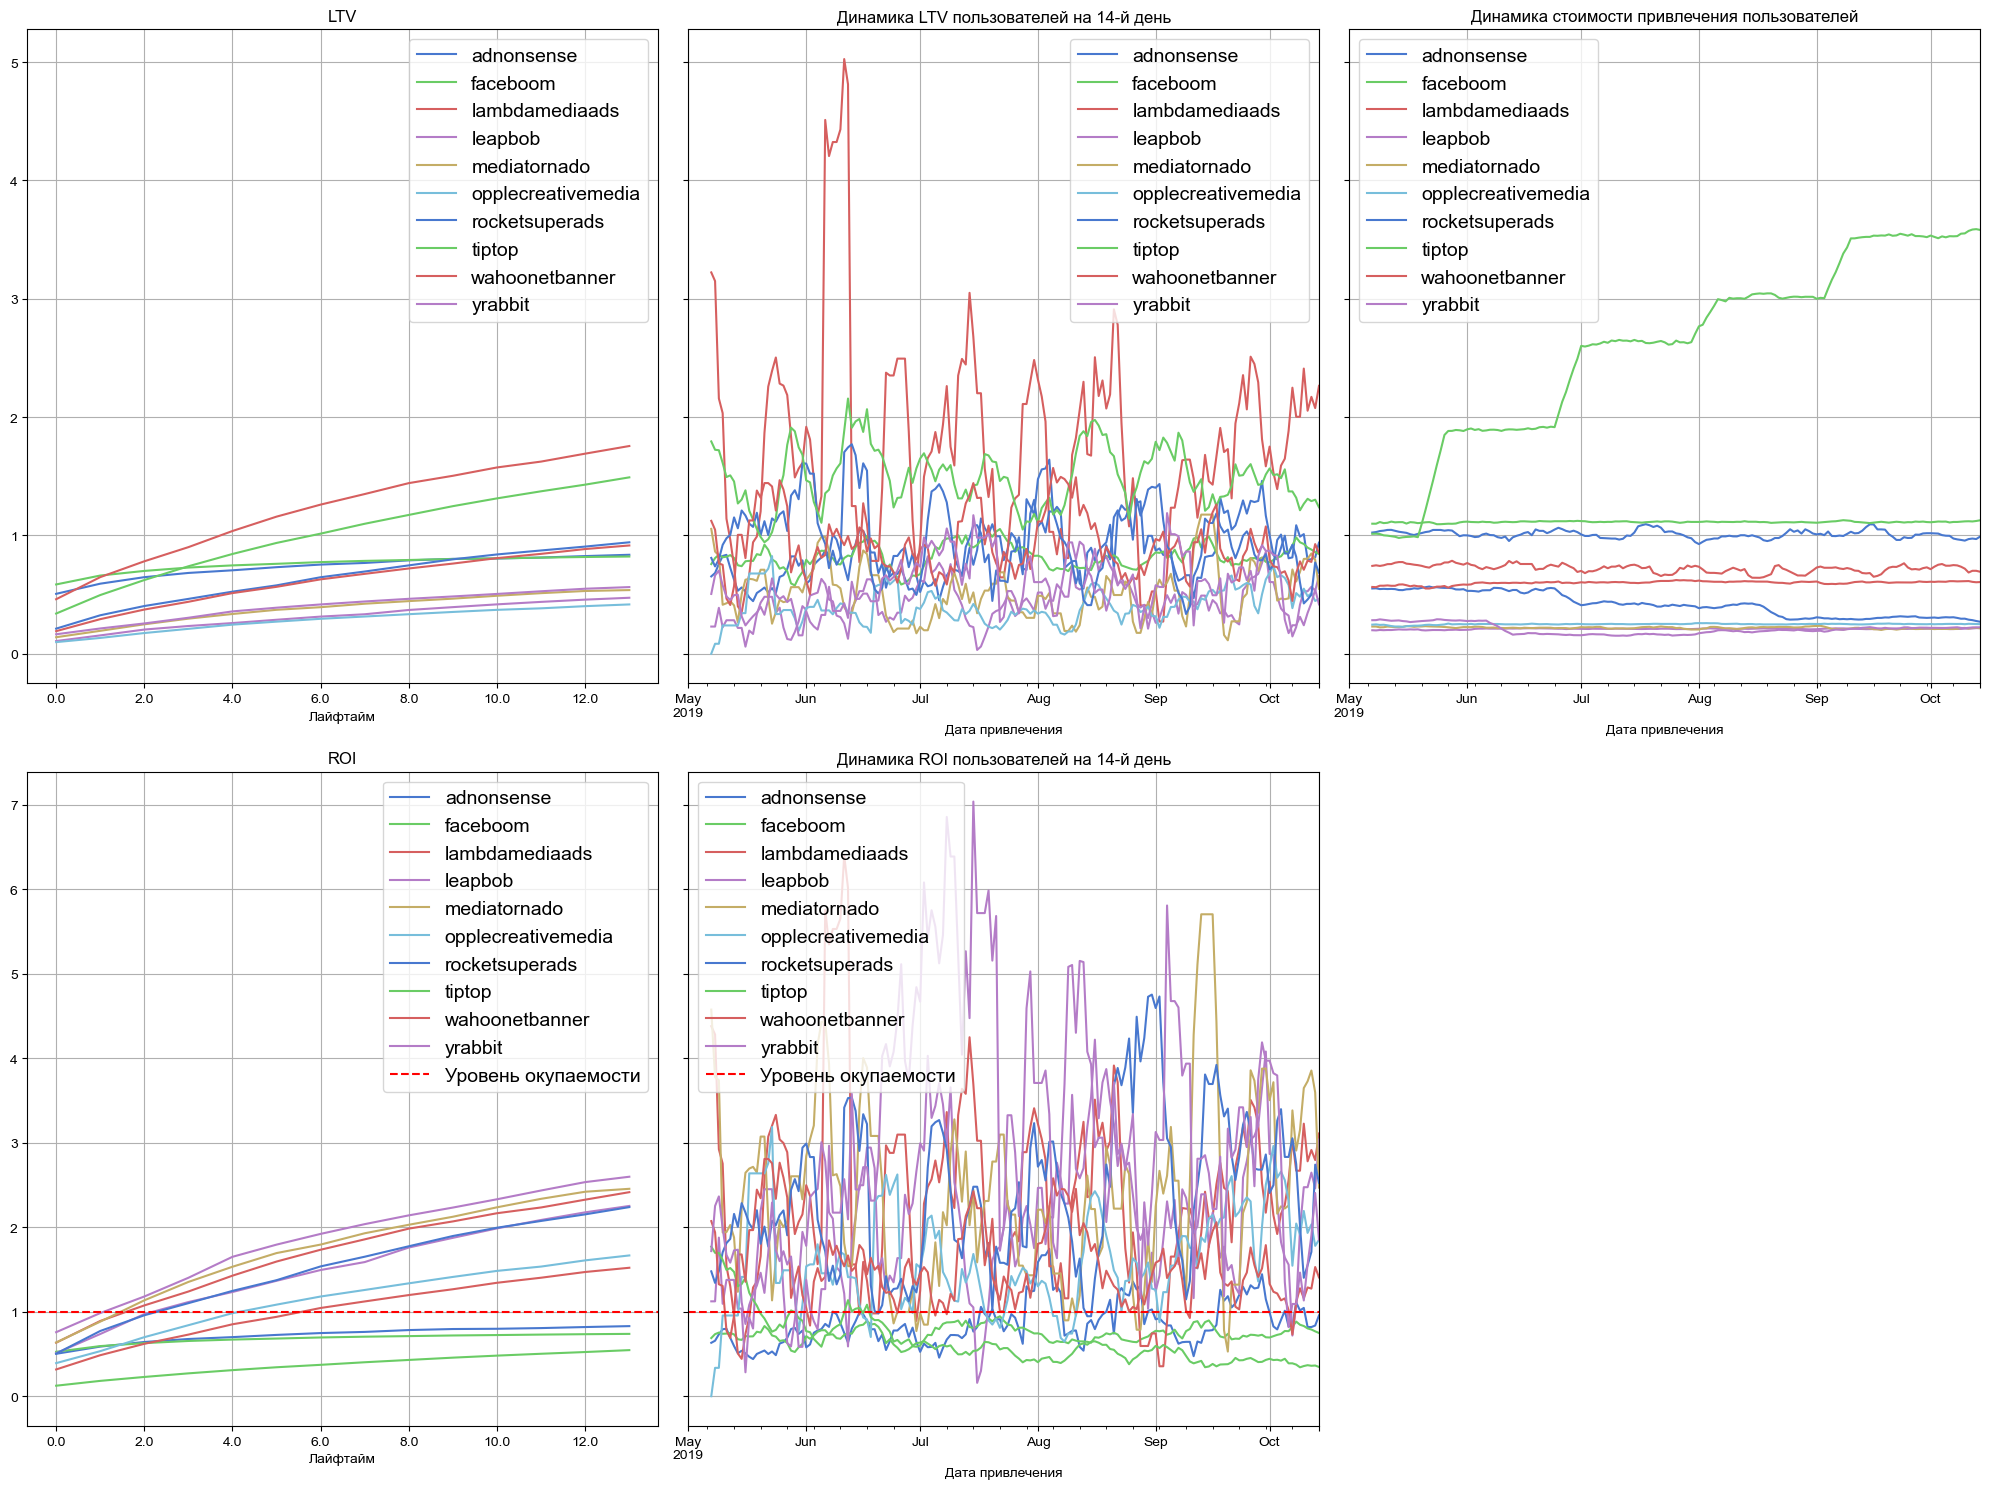

In [61]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders_main, observation_date, horizon_days_14,\
                                                      dimensions=['channel'],ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

### Сбор дополнительных данных по платным клиентам
Для полноценного итогового вывода необходимо получить некоторые дополнительные данные.

Для выводов итоговых необходимо посчитать сколько привлекается через разлиные каналы клинетов по странам (за исключением тех, кто сам пришел). Прим. начиная с п. 4.5. в переменной profiles только платные клиенты 

In [62]:
region_users = (
    profiles
    .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='ratio_users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )
region_users

In [63]:
channel_users = (
    profiles
    .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )
channel_users

In [64]:
device_users = (
    profiles
    .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
    .droplevel(1, axis=1)
    .reset_index()
    .rename(columns={'count': 'users', 'sum': 'paying_users', 'mean': 'ratio_users'})
    .sort_values(by='users', ascending=False)
    .style.format({'ratio_users': '{:.2%}'})
 )
device_users

**Выводы**
1. Показатель LTV выше всего у lambdamediaads и tiptop
2. Стоимость привлечения пользователей самая высокая у канала tiptop, как отмечалось ранее ее рост очунь существенный на всем протяжении наблюдения.
3. Реклама в каналах tiptop, faceboom и adnonsense (rocketsuperads?) убыточная, хотя эти каналы являются одними из самых популярных для привлечения пользователей.


З.Ы. вопрос к проверяющему, как можно скорректировать цвета (плохо читаются когда их больше 5-ти), была мысль дополнить функцию, добавить перечисление с цветов
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan'] и через цикл прогонять по очереди в параметре plot для каждого расчета, но во первых опасаюсь, что сломается функция, а во вторых не уверености что цикл с enumerate поможет 


### Анализ рынка США
Для проведения анализа в срезе только США, сделаем выборку основного файла profiles по данному региону, пропустим его через наши функции

In [65]:
profiles_USA=profiles.query ('region=="united states"')

#### Анализ окупаемости рекламы, конверсии и удержания пользователей в США , с разбивкой по каналам

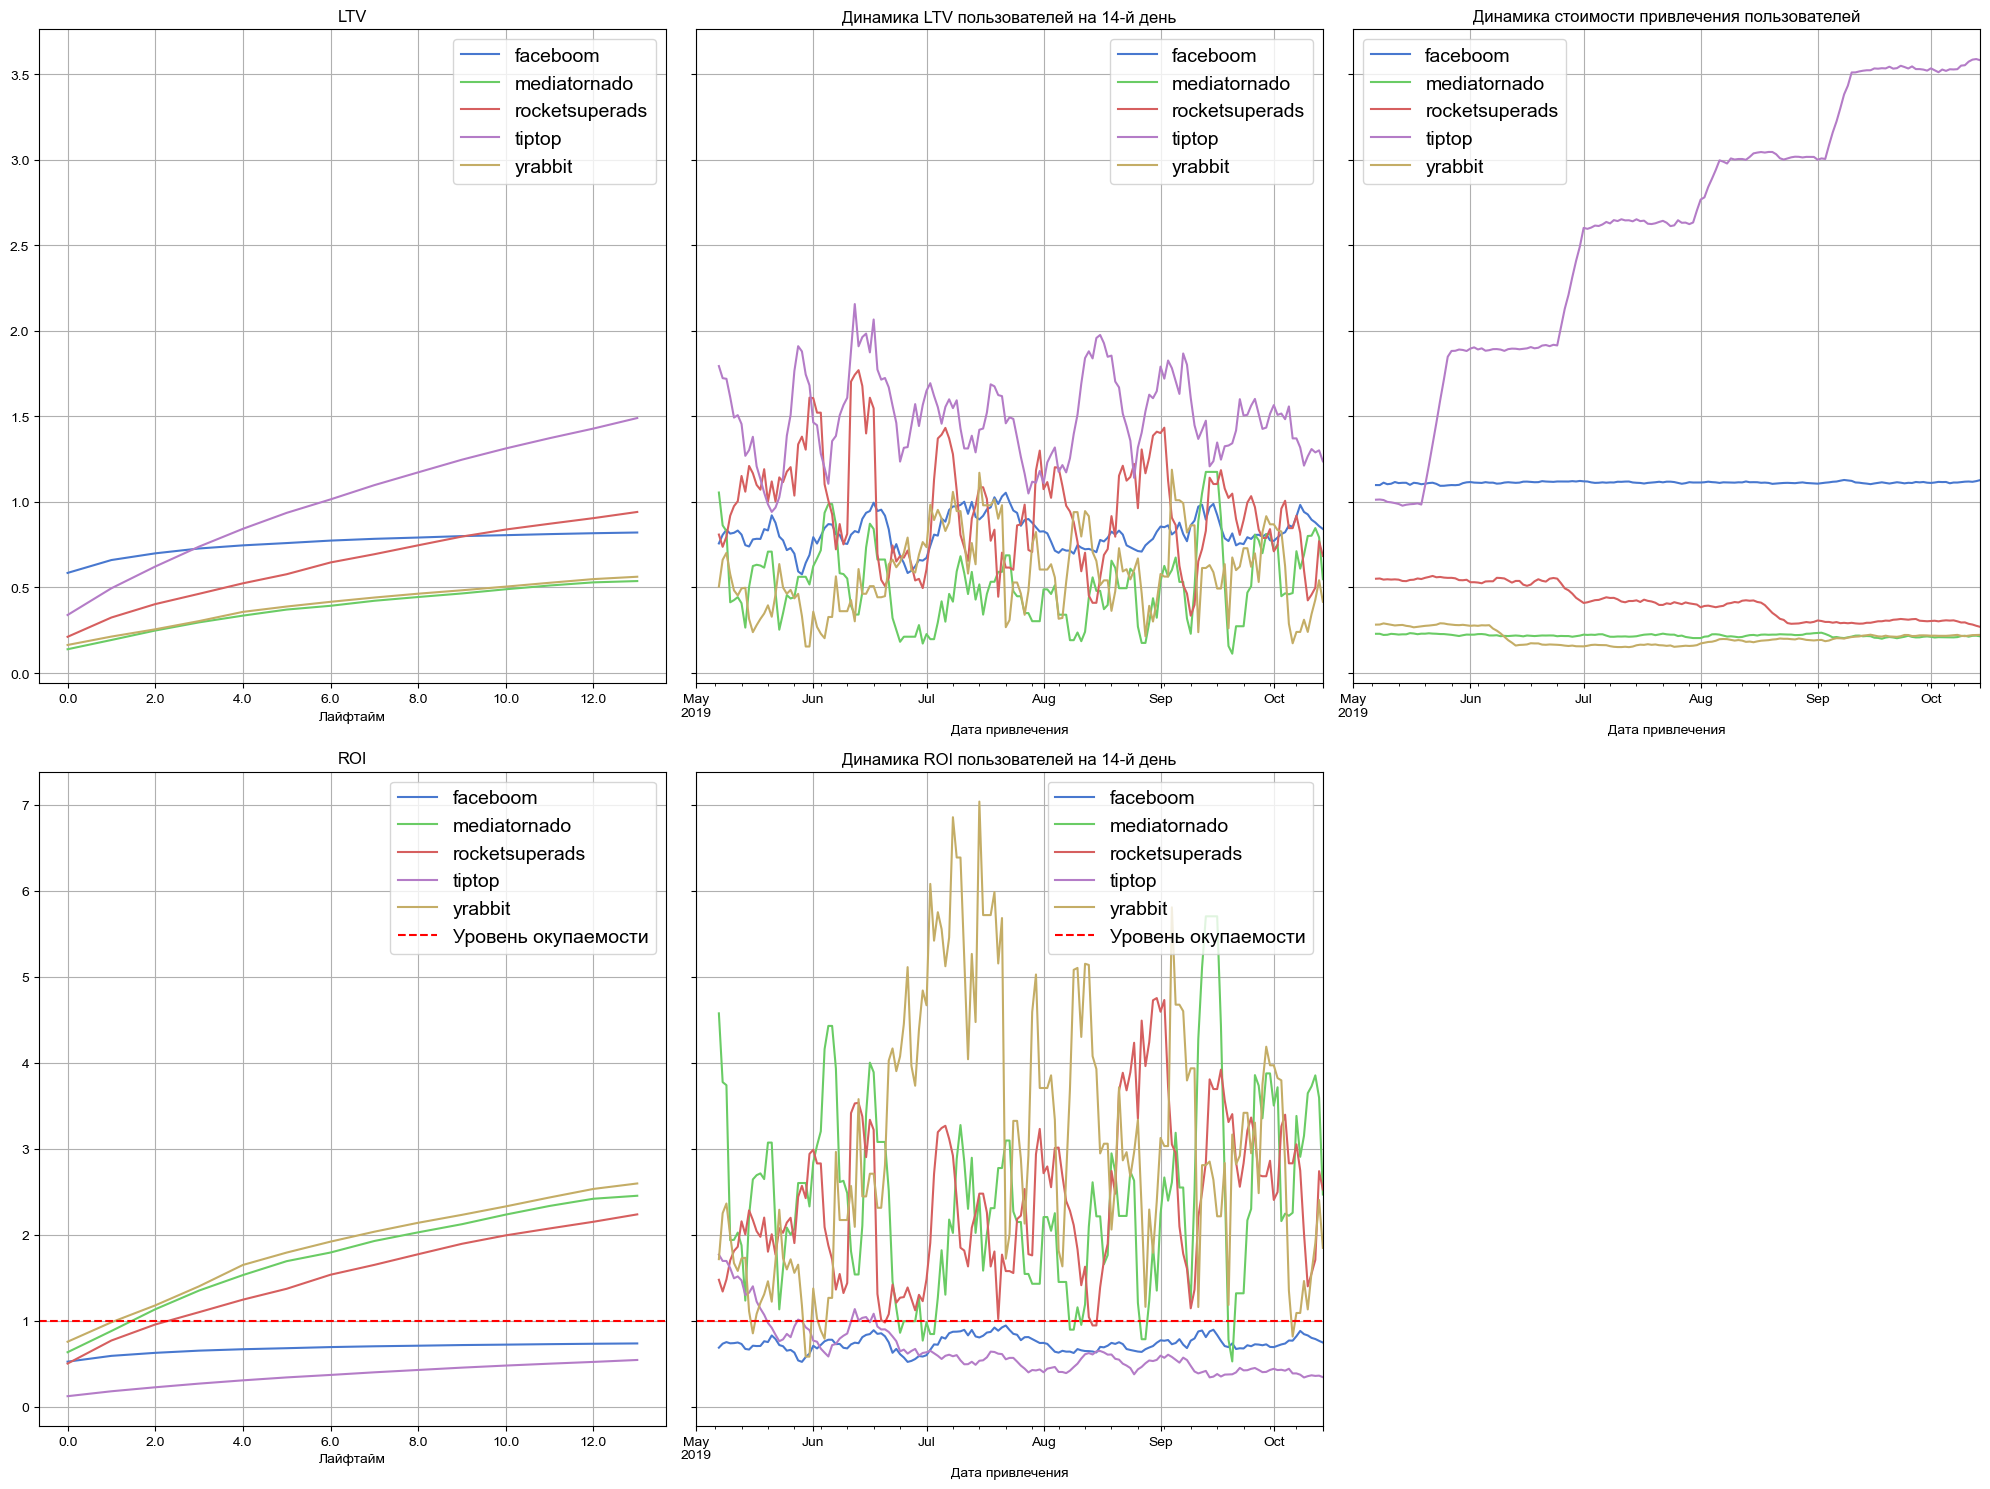

In [66]:
dimensions=['channel']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_USA, orders_main,\
                                                      observation_date, horizon_days_14,dimensions=dimensions,ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

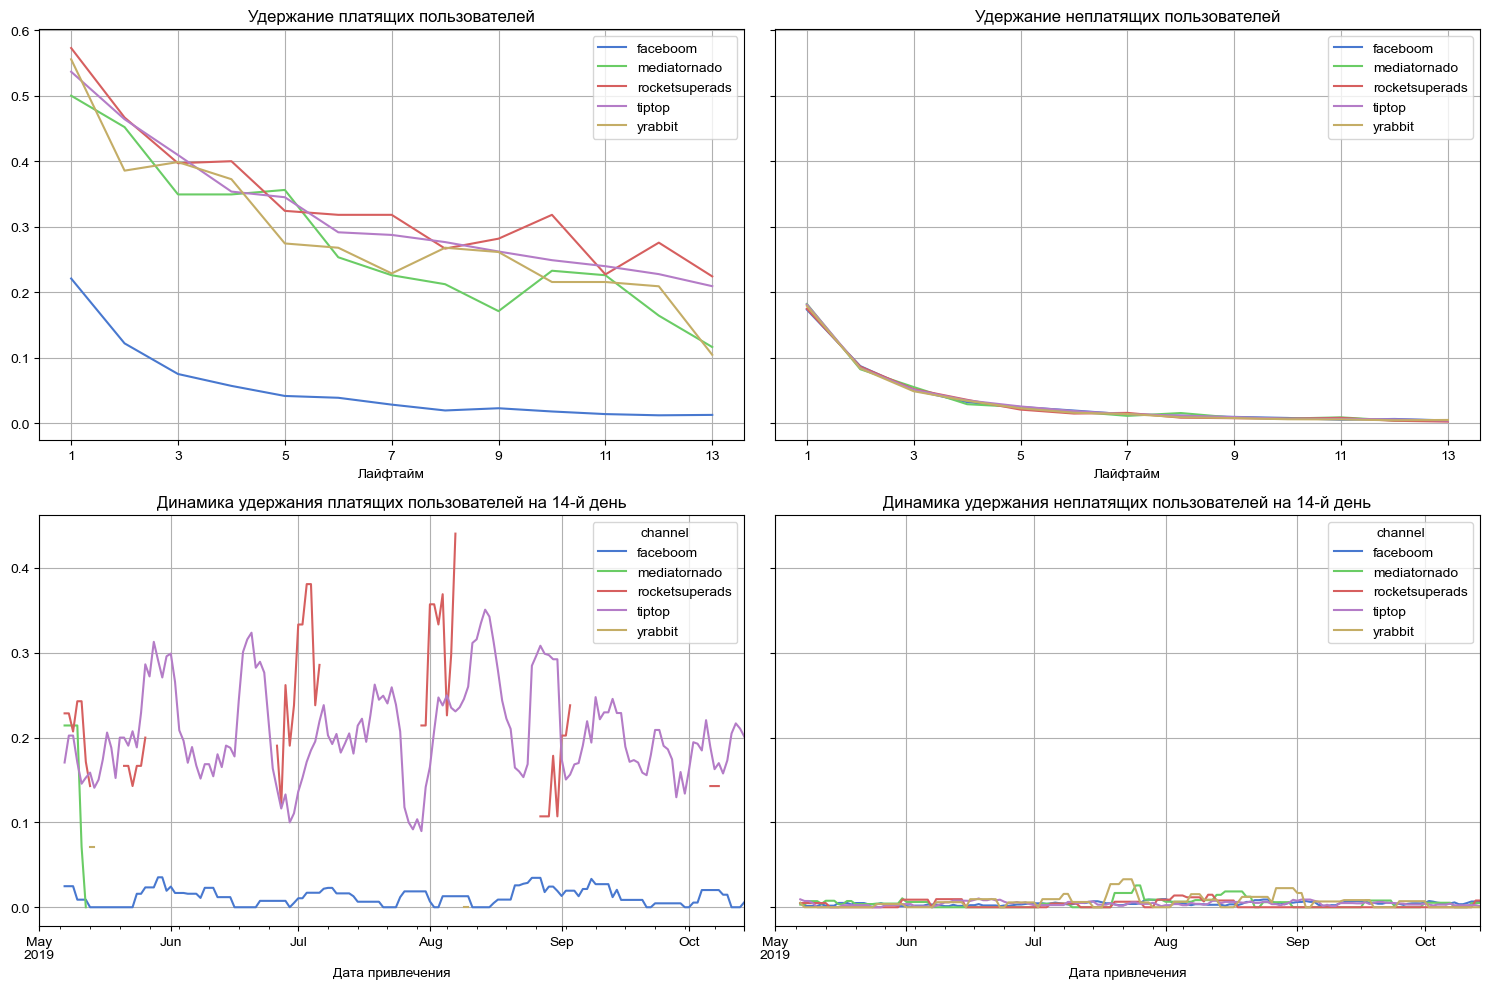

In [67]:
retention_raw, retention, retention_history = get_retention(profiles_USA, visits_main, observation_date,\
                                                               horizon_days_14, dimensions=dimensions, ignore_horizon=False)
plot_retention(retention, retention_history, horizon_days_14, window=7)

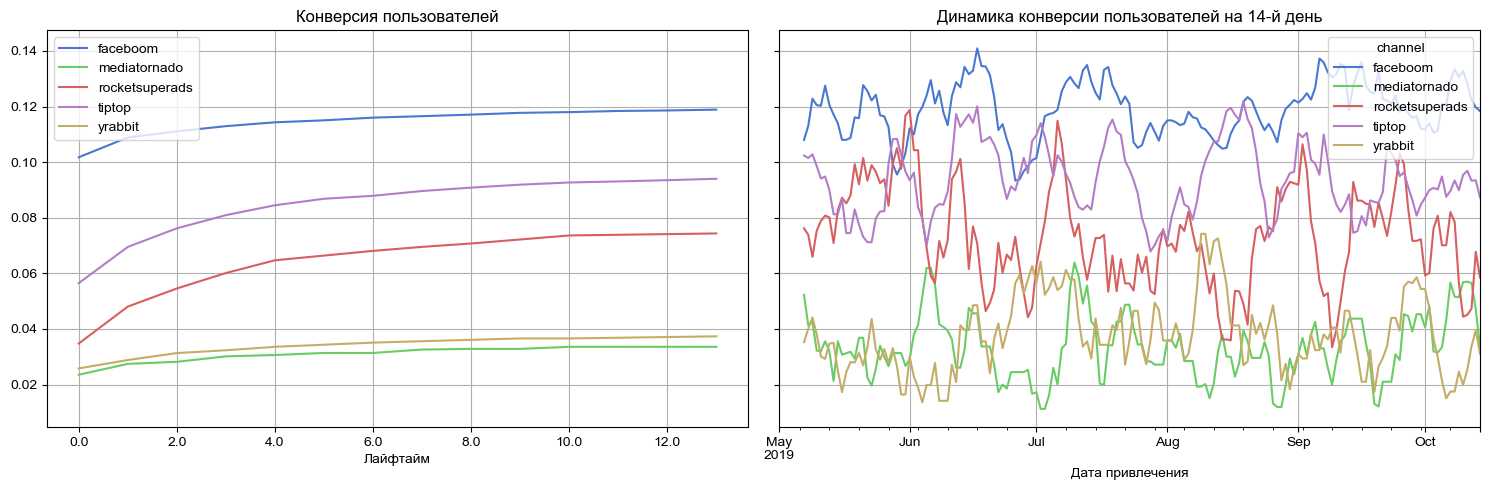

In [68]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_USA,orders_main, observation_date,\
                                                                horizon_days_14,dimensions=dimensions, ignore_horizon=False)
plot_conversion(conversion, conversion_history, horizon_days_14, window=7)

**Вывод (распределение - каналы)**

    1. В рамках периода жизни в 14 дней, лучший показатель в части дохода с одного клиента (LTV) у канала tiptop, к 14 дни достигает 1.5, остальные не превышают 1, стоит отметить, что канал rocketsuperads с 10-го дня выходит на второе место по доходности, опережая faceboom.
    2. Динамика стоимости привлечения нам показывает уже знакомую картину - канал tiptop постоянно дорожает, а faceboom несмотря на то, что начинает с более высокой ценны, быстро теряет лидерство по стоимости, и его стоимость привлечения 1 клиента практически не меняется на всем протяжении. А вот стоимость ранее отмеченного канала rocketsuperads даже снижается.
    3. В противовес к "позитивной" картины из п.1 становится более наглядной общая ситуация. каналы tiptop и faceboom не выходят на уровень окупаемости вовсе, а вот каналы yrabbit, rocketsuperads и mediatornado напротив показывают стабильный и существенный рост окупаемости.
    4. Анализ динамики удержания платящих пользователей показывает, что пользователи пришедшие через faceboom, имеют худший показатель удержания, а вот rocketsuperads в очередной раз показывает себя с лучшей стороны.
    5. Анализ конверсии показывает, что лучшая конверсия у канала faceboom, начинается с 0,10 первого дня и стремится к 0.12 очень равномерно, но как отмечалось в п.4 удержание пользователей худшее из каналов. Что важно отметить, что в среднем конверсия не превышает 10%. 
    
*Предварительная рекомендация*

Рекламному отделу стоит скорректировать свою рекламную стратегию на рынке США, в частности пересмотреть распределение бюджета в отношении tiptop и faceboom, и больше обратить внимание на более перспективные каналы, такие как yrabbit, rocketsuperads и mediatornado, а также стоит подумать над повышением конверсии, так как к 14 дню ее уровень находится в диапазоне от 4% до 12%, при этом 12% у канала faceboom удержание клиентов , пришедших через него, оставляет желать лучшего, а конверсия перспективных каналов с более высоким уровнем удержания к 14 дню не превышает 8%.


#### Анализ окупаемости рекламы, конверсии и удержания пользователей в США, с разбивкой по устройствам

In [69]:
dimensions=['device']

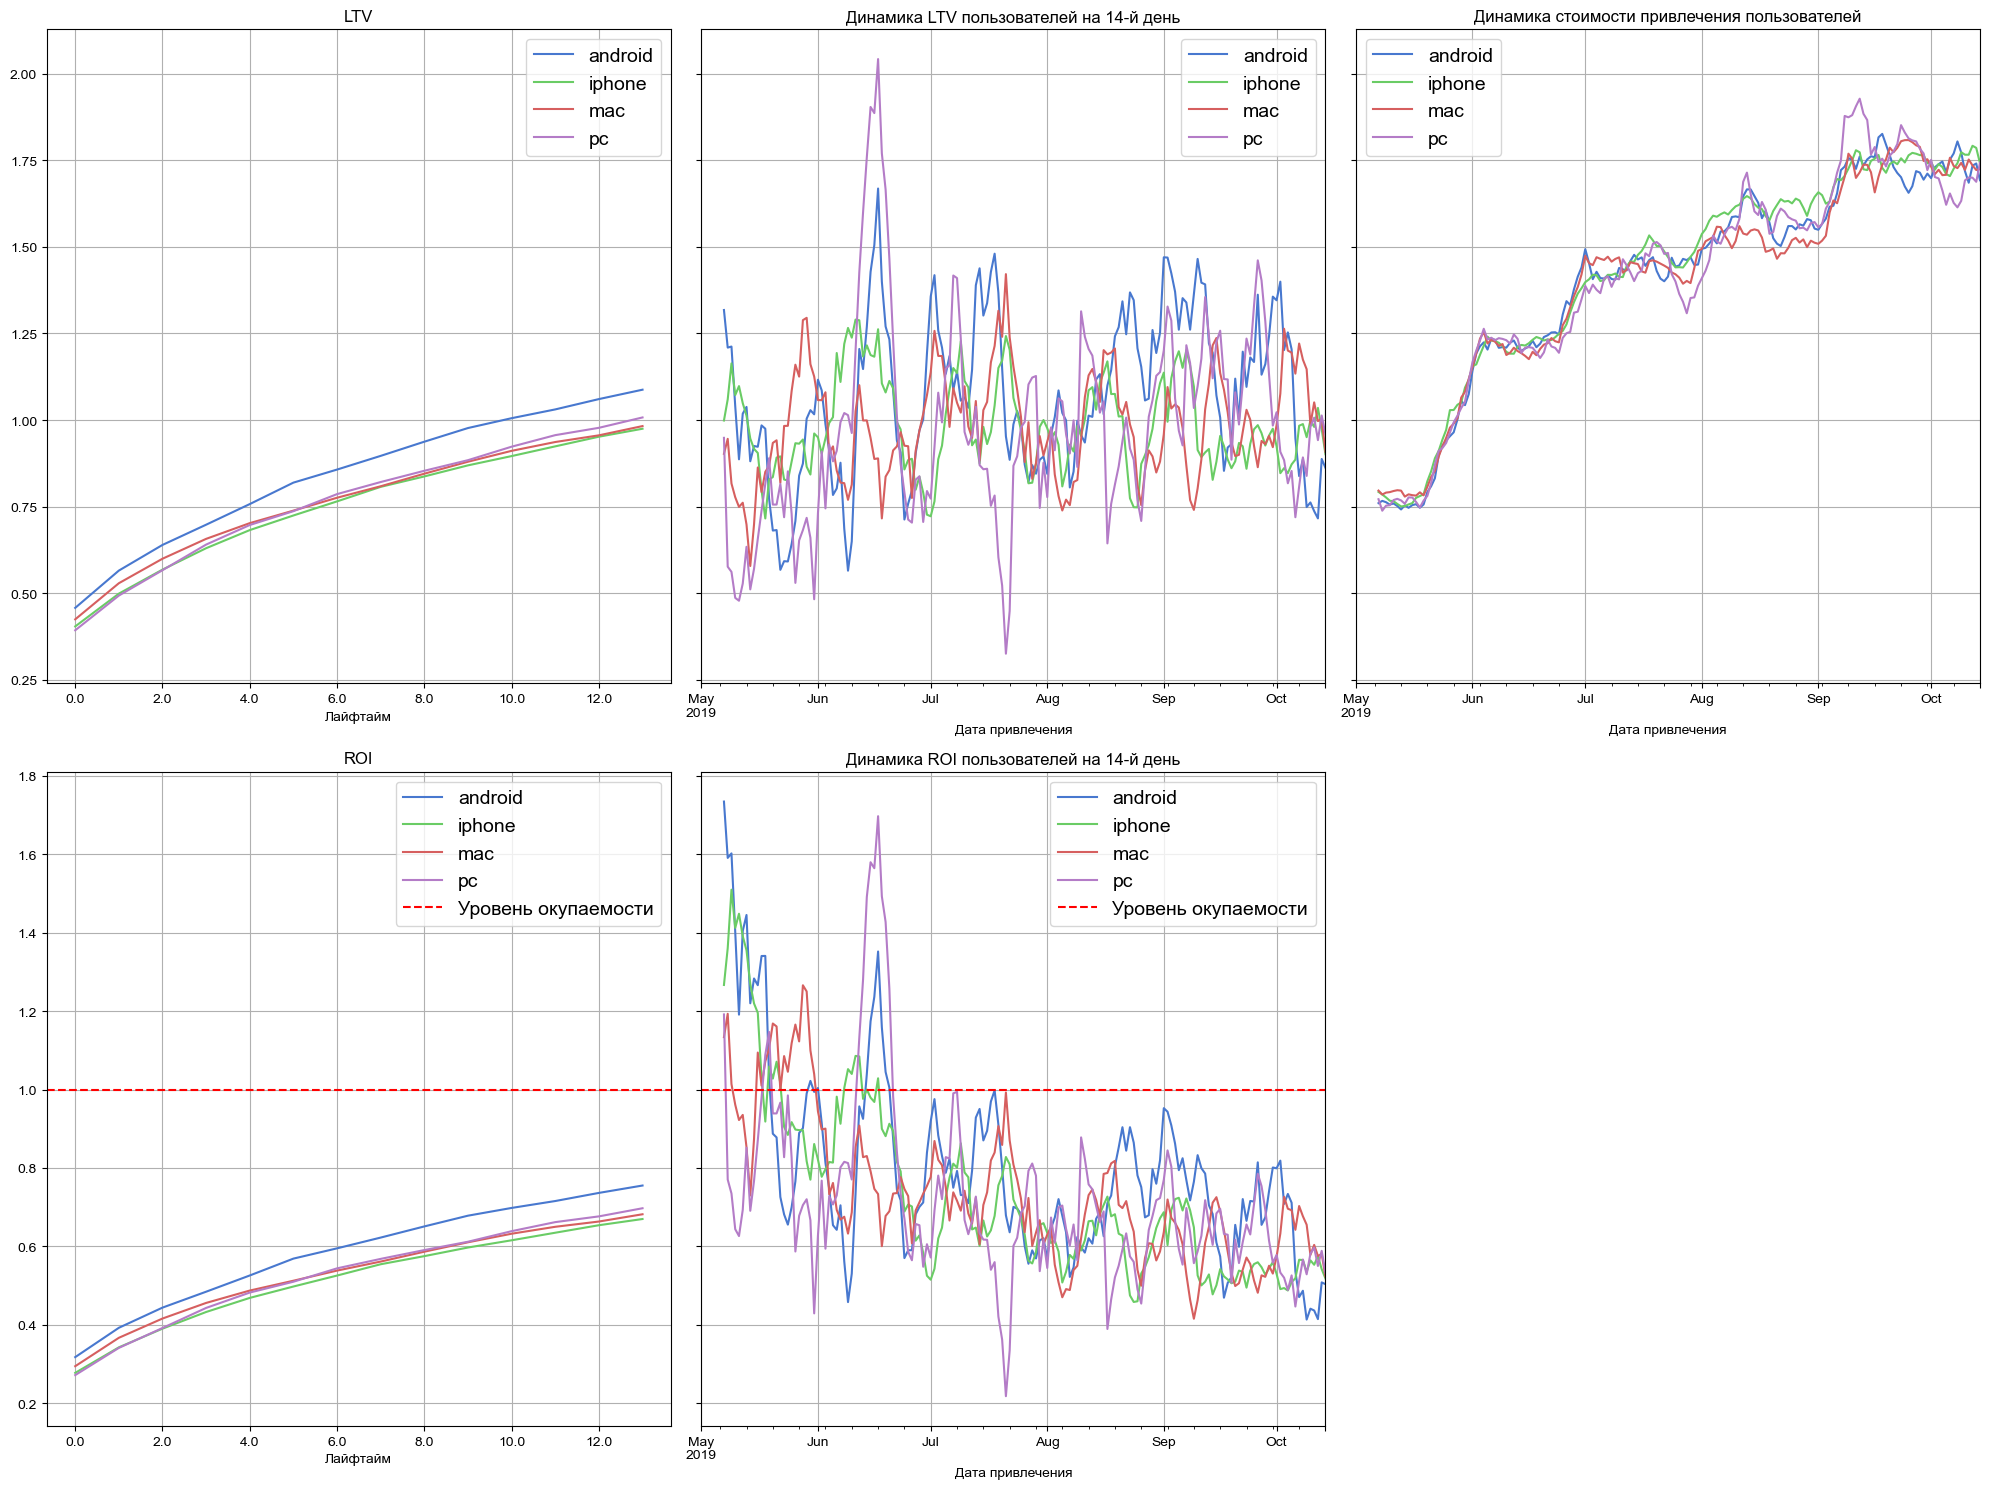

In [70]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_USA, orders_main,\
                                                      observation_date, horizon_days_14,dimensions=dimensions,ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

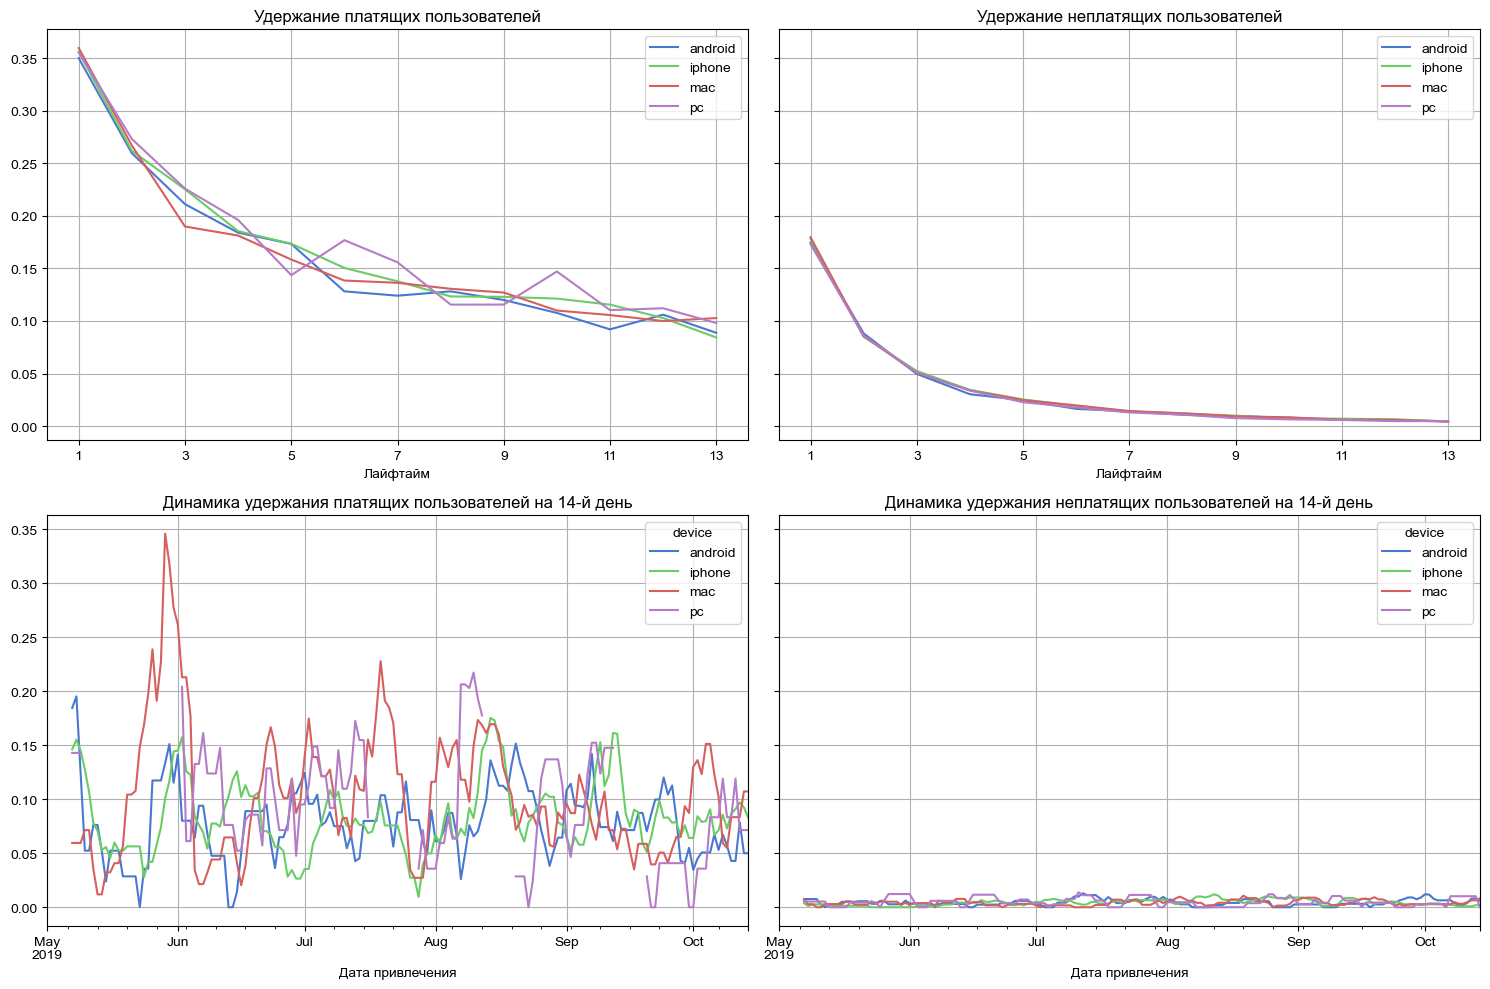

In [71]:
retention_raw, retention, retention_history = get_retention(profiles_USA, visits_main, observation_date,\
                                                               horizon_days_14, dimensions=dimensions, ignore_horizon=False)
plot_retention(retention, retention_history, horizon_days_14, window=7)

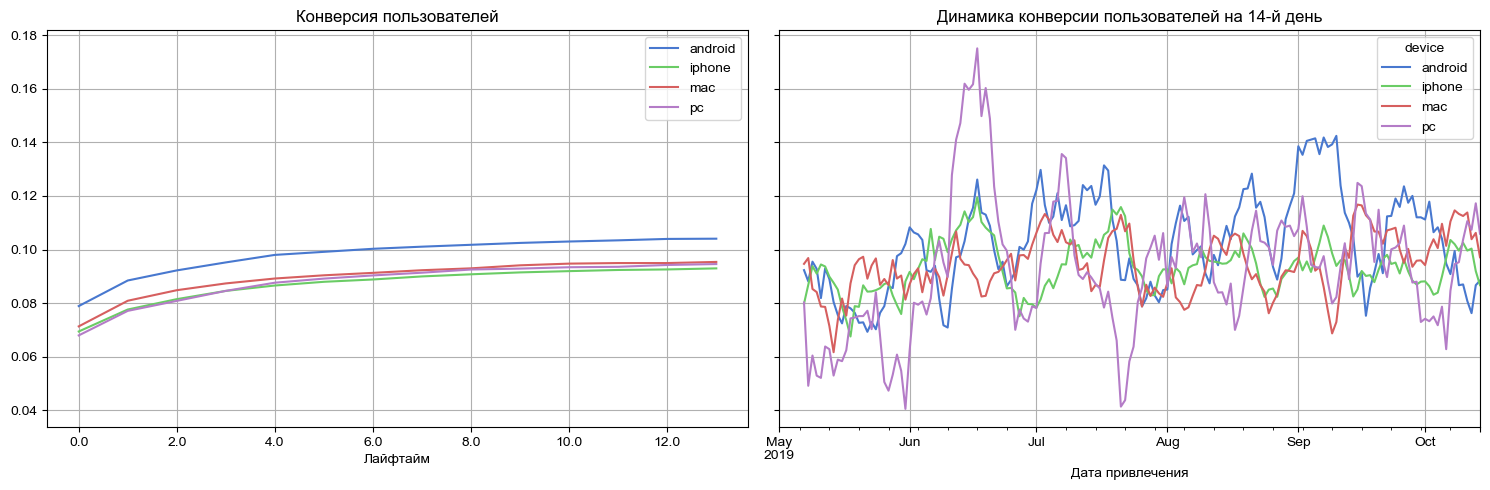

In [72]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_USA,orders_main, observation_date,\
                                                                horizon_days_14,dimensions=dimensions, ignore_horizon=False)
plot_conversion(conversion, conversion_history, horizon_days_14, window=7)

**Вывод**

    1. Чуть более лучшую конверсию показывают пользователи устройств android, владельцы остальных устройств примерно на одном уровне. Из общего - начиная с 4 дня рост конверсии практически останавливается у всех пользователей. 
    2. Окупаемость инвестиций в рекламы ни по одному устройству не переходит за границу окупаемости, чуть лучше себя показывают опять владельцы устройств на android, но все же они тоже не окупаются. 
    3. На графике динамики конверсии пользователей стоит отметить странные пики и падения у владельцев стационарных пк в начале июня (падение), затем существенный рост в середине июня, и вновь падение в начале 3 декады июля, стоит задать вопрос коллегам, возможно в данные периоды наблюдались какие-то проблемы технического плана, а период роста связан с проведением временных акций. 
    
*Промежуточные рекомендации*

Кроме указанных вопросов в п.3, стоит обратить внимание отдела продаж на чуть более лучшие показатели у владельцев устройств на android, возможно приложение для данных устройств имеет какие-то отличия в интерфейсе и функциональности, которое позволяет получить показатели чуть лучше чем у владельцев других устройств, но концентрировать внимание только на этом моменте не стоит, так как разница не существенная, есть более важные точки роста отмеченные ранее.


### Анализ рынка Европы
Проведем аналогичную оценку для рынка Европы

#### Анализ окупаемости рекламы, конверсии и удержания пользователей в Европе, с разбивкой по каналам

In [73]:
profiles_EU=profiles.query ('region!="united states"')

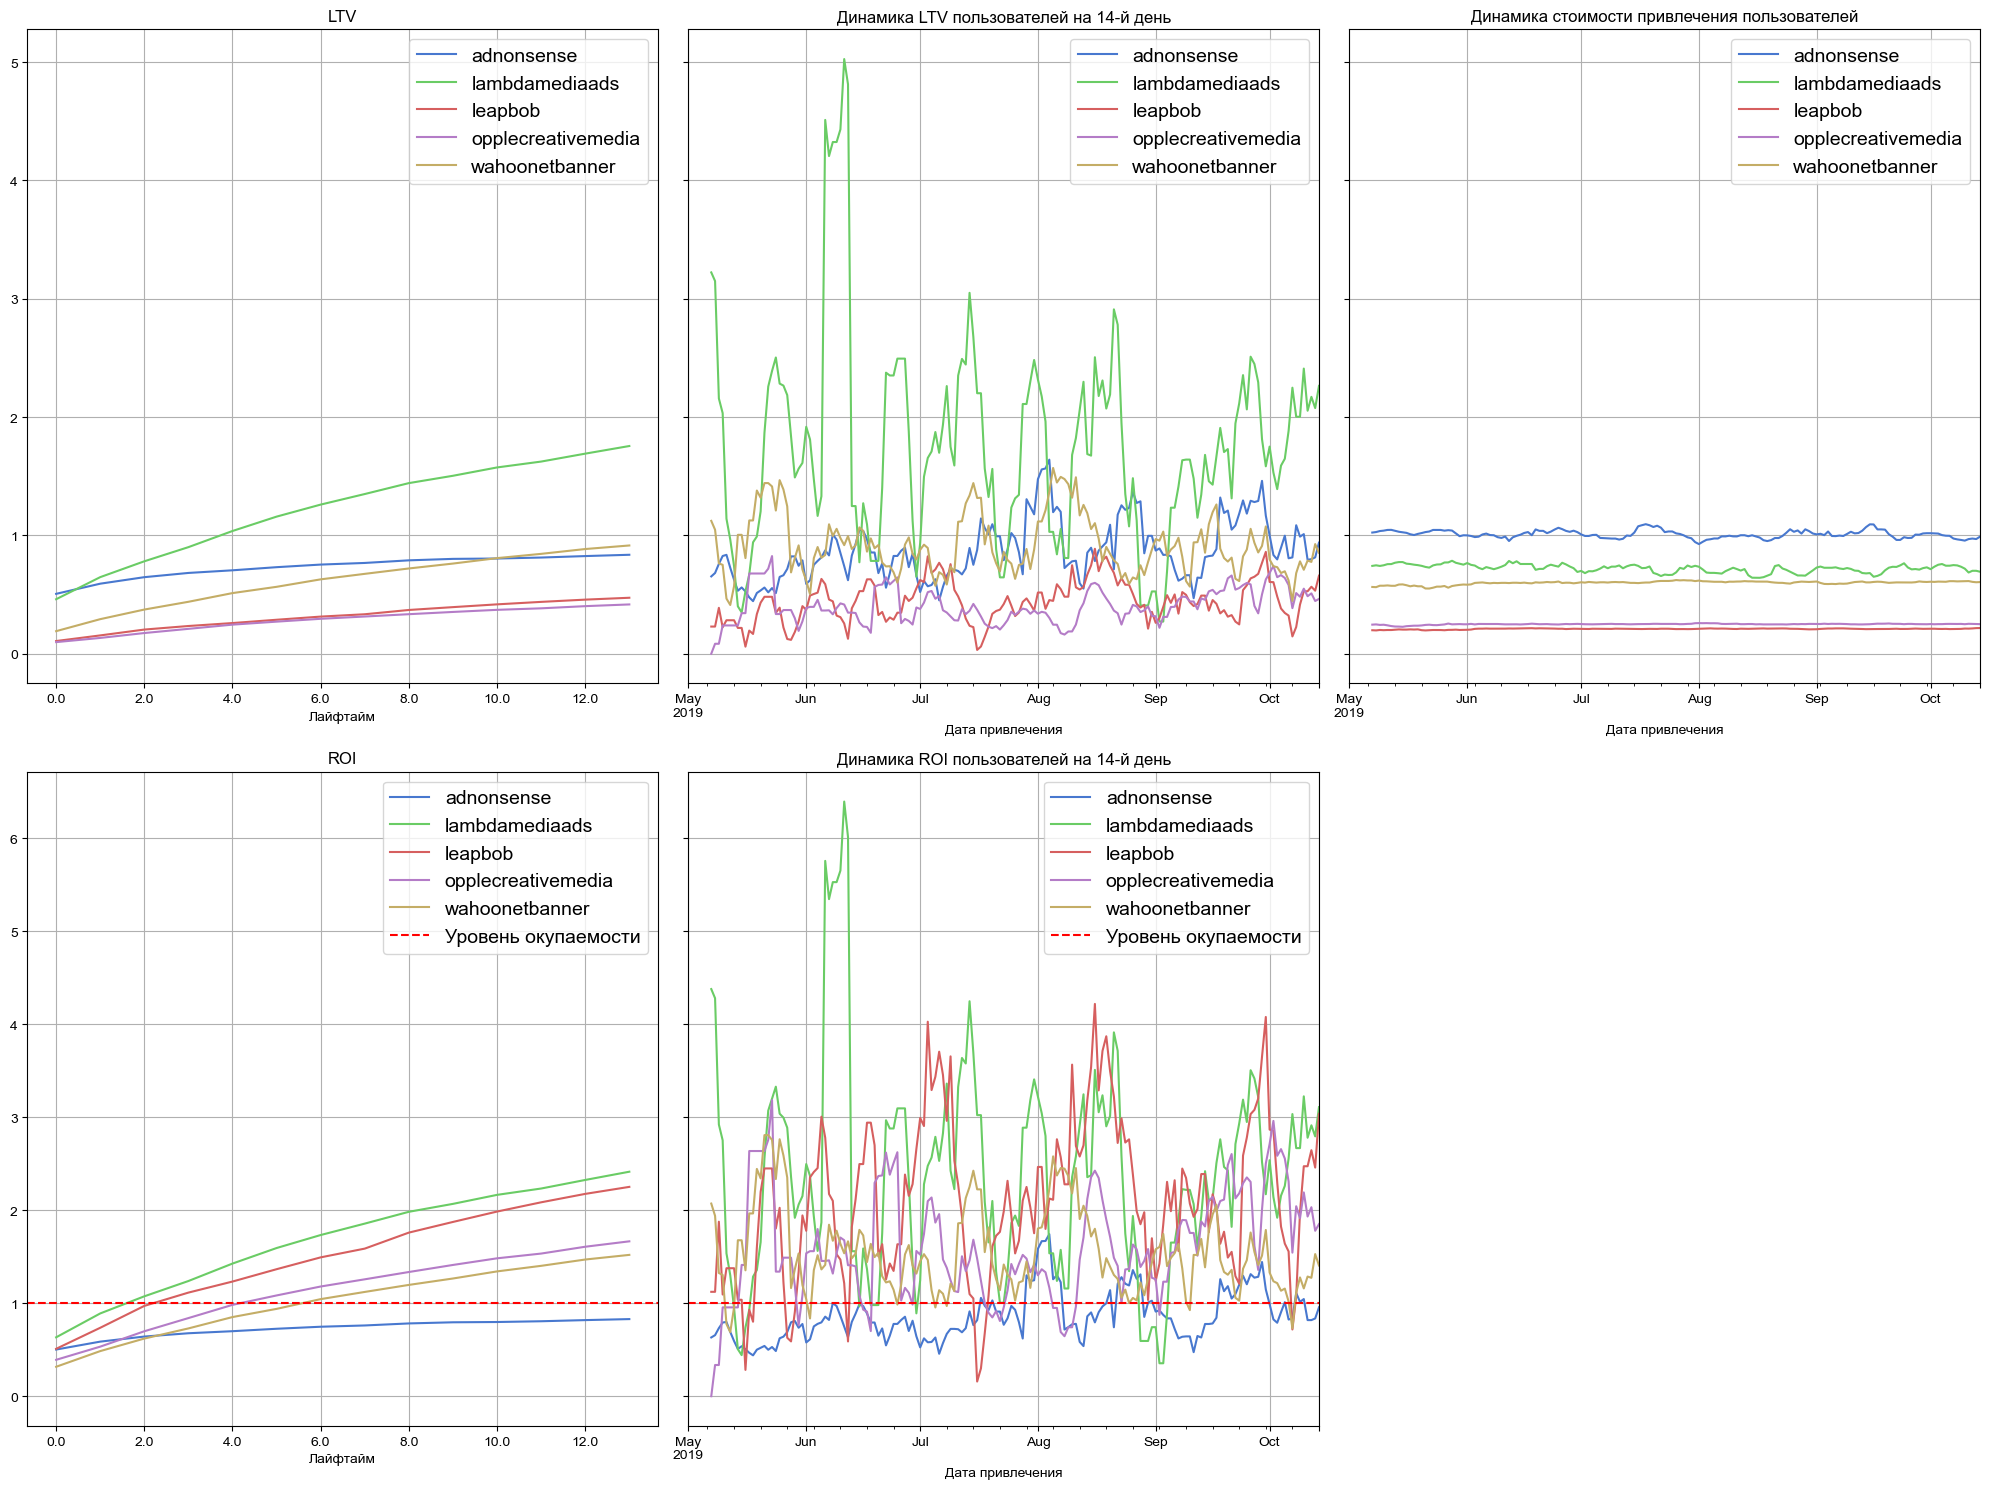

In [74]:
dimensions=['channel']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_EU, orders_main,\
                                                      observation_date, horizon_days_14,dimensions=dimensions,ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

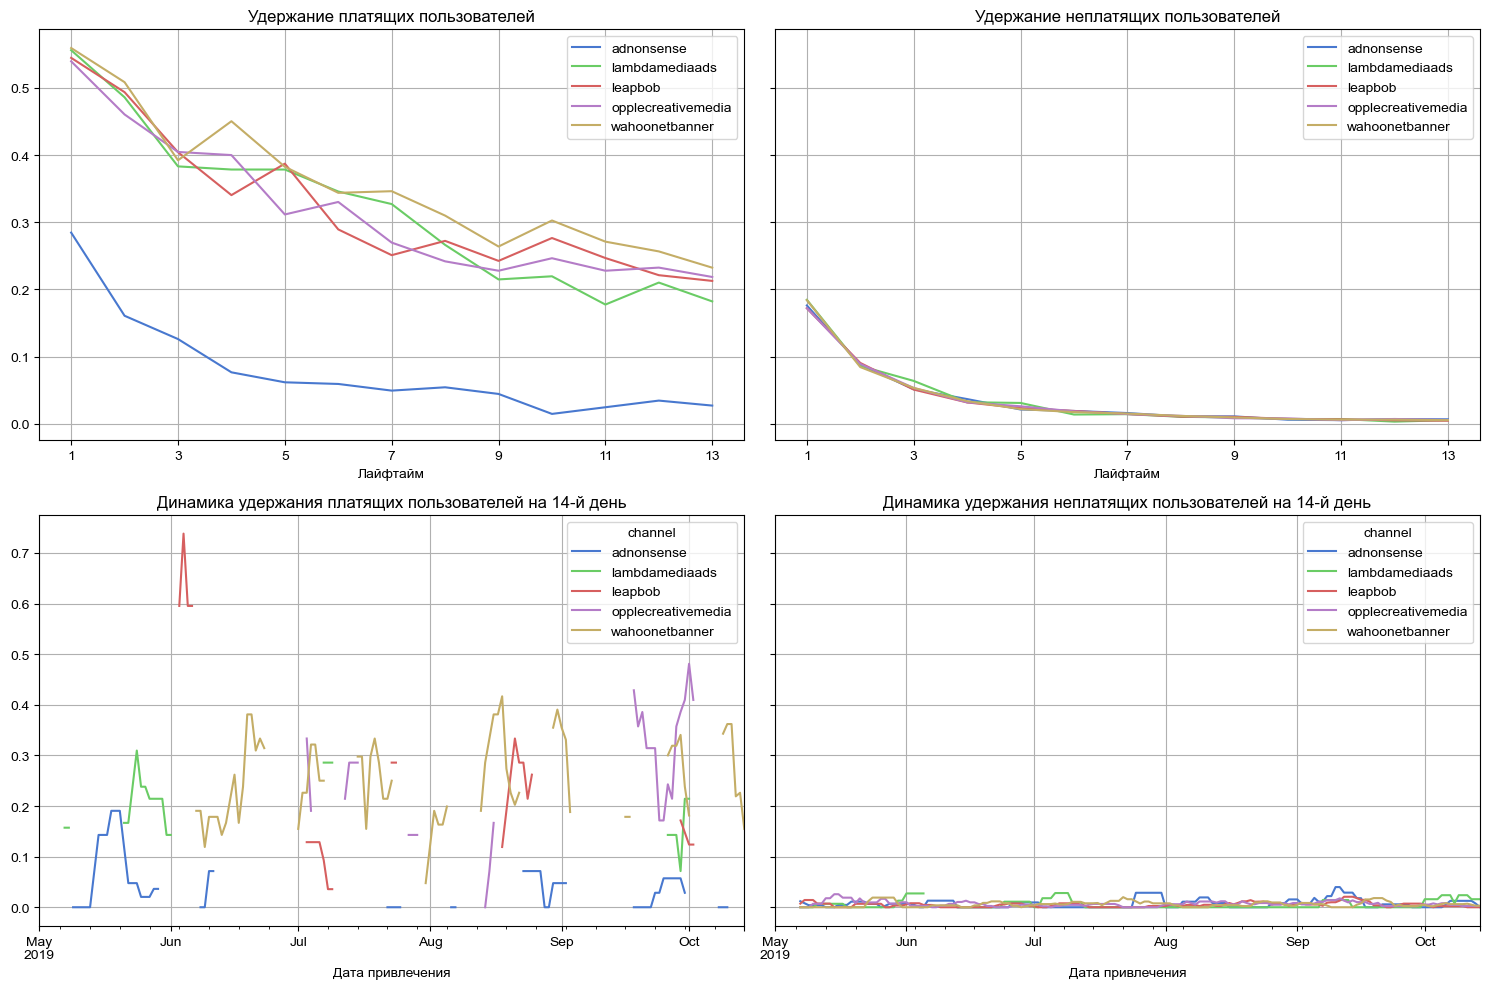

In [75]:
retention_raw, retention, retention_history = get_retention(profiles_EU, visits_main, observation_date,\
                                                               horizon_days_14, dimensions=dimensions, ignore_horizon=False)
plot_retention(retention, retention_history, horizon_days_14, window=7)

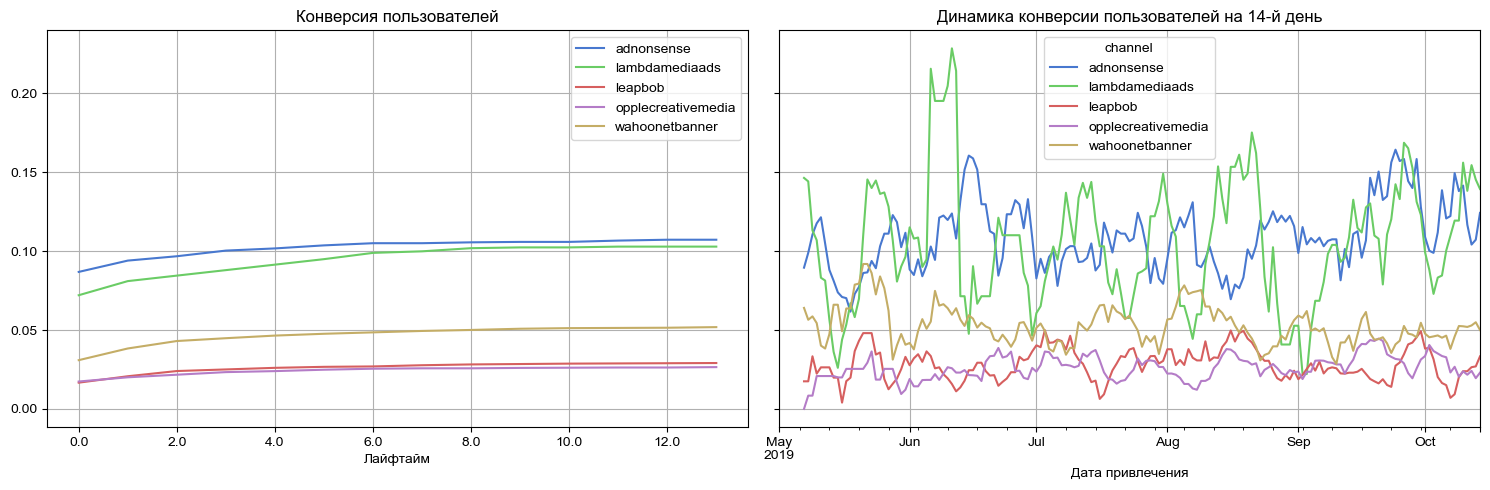

In [76]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_EU,orders_main, observation_date,\
                                                                horizon_days_14,dimensions=dimensions, ignore_horizon=False)
plot_conversion(conversion, conversion_history, horizon_days_14, window=7)

**Вывод**

    1. На европейском рынке, согласно результатам изучения, общая картина иная, как и лидеры. Так, лидером по значению LTV является lambdamediaads, второе место между собой делят adnonsense  и wahoonetbanner , при этом на 14 день последний немного опережает по показателям доходности. Стоит отметить, что лидеры рынка США - tiptop и faceboom на рынке Европы не представлены. 
    2. Динамика LTV показывает, что lambdamediaads в средней статистке существенно опережает конкурентов, при этом стоит отметить. что затраты на привлечение одного клиента через lambdamediaads находятся только на втором месте, и не превышают единицы, дороже обходится только adnonsense, но все каналы держатся достаточно равномерно в своем ценовом диапазоне, без проявления критических как скачков так и падений. 
    3. Показатель ROI имеет хорошую тенденцию на окупаемость, и по результатам 6-ти месяцев все каналы, за исключением adnonsense, переходят границу окупаемости, при этом adnonsense, хоть и не выходит в плюс, стремится к ней по итогам 14 дней (около 90%).
    4. Более низкий показатель ROI в канале adnonsense объясняется низким уровнем удержания, если быть точнее, то данный показатель у adnonsense самый низкий из всех каналов Европейской площадки, и по истечению 14-дневного периода не превышает 5%, в отличии от конкурентов, у которых он более равномерно снижается и к 14-му дню доходит до границы 20%-25%, отдельно выделять лидеров нет необходимости, так как все оставшиеся площадки показывают схожую картину по уровню удержания.
    5. Уровень конверсии самый высокий у adnonsense, но как уже отмечалось ранее, уровень удержания крайне низкий, немногим от лидера по уровню конверсии отстает lambdamediaads, и оба канала к 14 дню выходят на уровень около 10%. на остальных площадках уровень конверсии не превышает 5%
    
*Предварительная рекомендация*

Изучив графики, прихожу к обоснованному выводу, что те каналы, которые имеют лучшую конвертацию, одновременно имеют худший показатель удержания, вероятно данная ситуация возникает по причине акцента на привлечении новых покупателей, без должного внимания на уже конвертировавшийся. Скорректировав акценты в части удержания, отдел рекламы сможет вывести все площадки в зону окупаемости на европейском рынке.

    

####  Анализ окупаемости рекламы, конверсии и удержания пользователей в Европе, с разбивкой по устройствам

In [77]:
dimensions=['device']

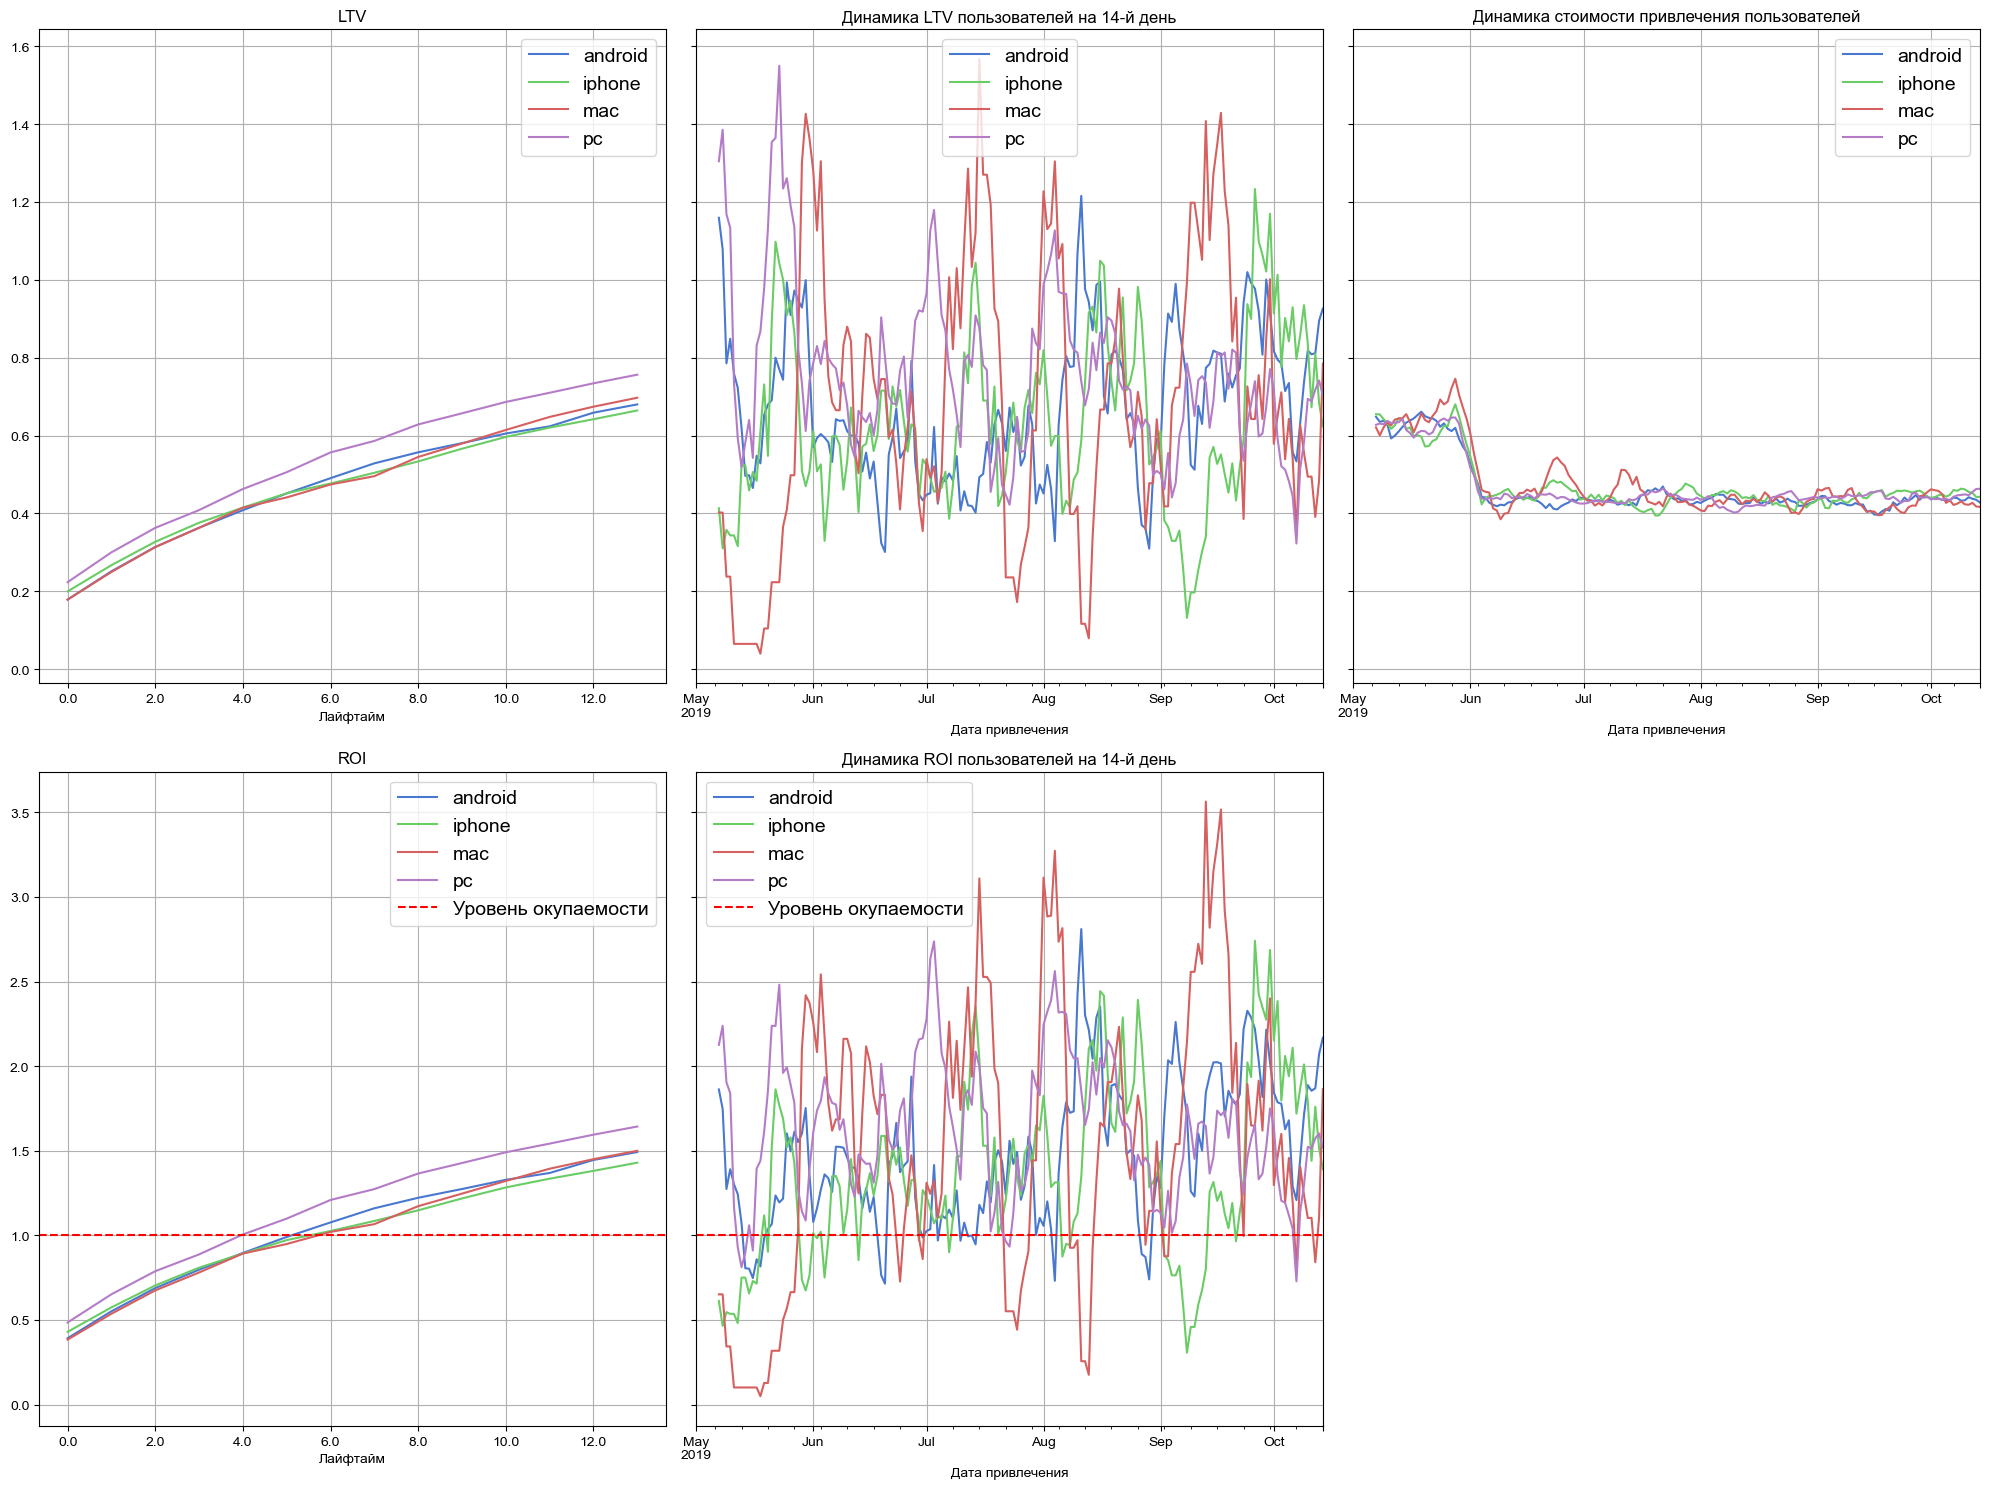

In [78]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles_EU, orders_main,\
                                                      observation_date, horizon_days_14,dimensions=dimensions,ignore_horizon=False)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days_14, window=7)

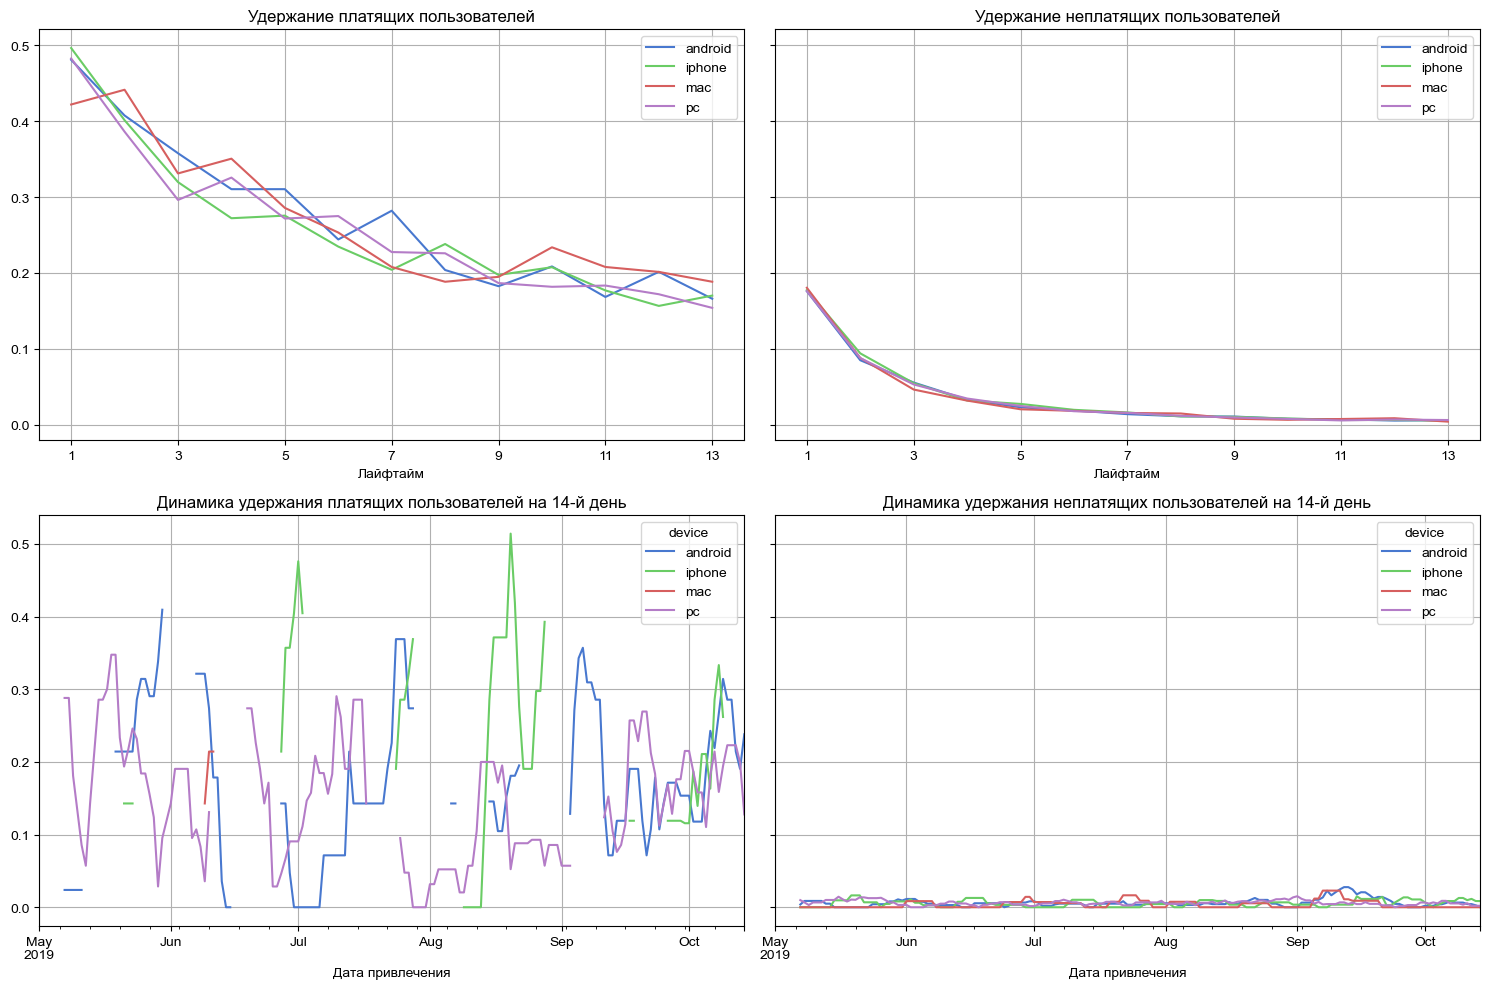

In [79]:
retention_raw, retention, retention_history = get_retention(profiles_EU, visits_main, observation_date,\
                                                               horizon_days_14, dimensions=dimensions, ignore_horizon=False)
plot_retention(retention, retention_history, horizon_days_14, window=7)

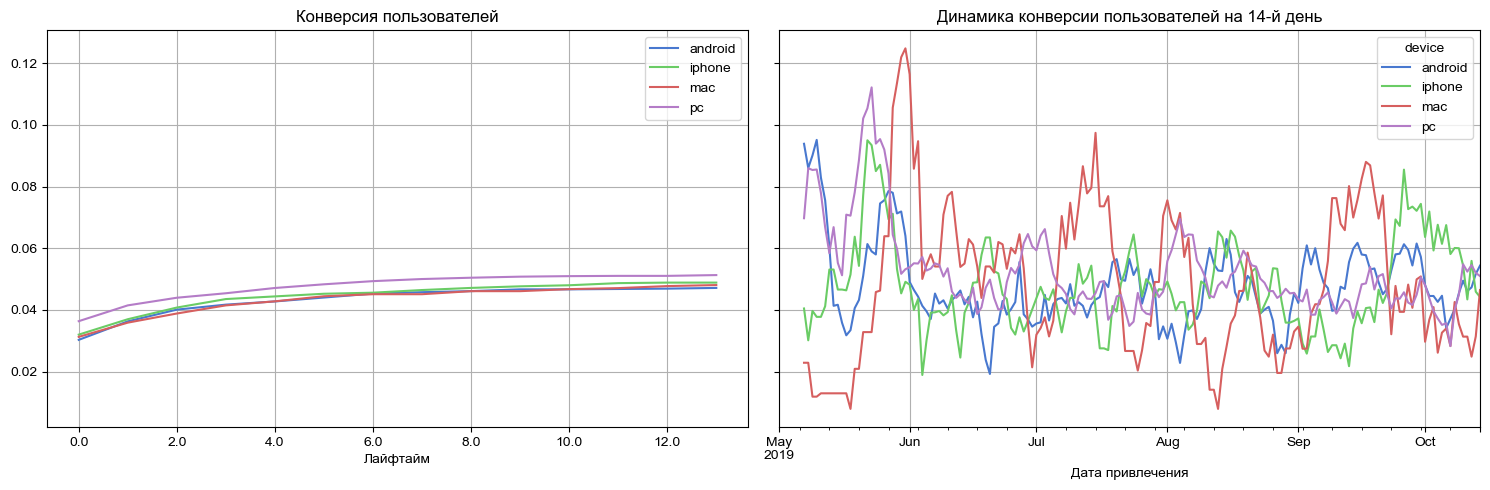

In [80]:
conversion_raw, conversion, conversion_history = get_conversion(profiles_EU,orders_main, observation_date,\
                                                                horizon_days_14,dimensions=dimensions, ignore_horizon=False)
plot_conversion(conversion, conversion_history, horizon_days_14, window=7)

**Выводы**

    1. Показатели LTV и ROI немного лучше у пользователей PC, владельцы устройств на других платформах идут примерно вровень. 
    2. Показатель ROI по прошествии 6-ти месяцев у всех платформ переходит границу окупаемости. 
    
Гипотеза для проверки - пользоваться приложением компании немного удобнее через PC, стоит коллегам рекомендовать проработать этот вопрос, без излишней концентрации на данном вопросе, так как есть куда более перспективные точки роста, отраженные выше.


# Итоговые выводы

    Несмотря на огромные вложения в рекламу, несколько последних месяцев компания Procrastinate Pro+ терпит убытки. С целью выявления причин сложившейся ситуации, поведен анализ данных о пользователях, привлеченных за период с 1 мая по 27 октября 2019 года. В рамках указанного анализа изучены:

	- лог сервера с данными о посещениях пользователей;
	- выгрузка покупок пользователей в приложении;
	- расходы на рекламы компании.

    1.	Общая сумма расходов на рекламу составила 105497.3. На графике динамики расходов по месяцам заметно значительное повышение расходов на рекламу на протяжении практически на всем периоде анализируемого периода, а именно начиная с примерно с 15 мая по октябрь. В начале октябрь имел место спад.

    2.	Привлечение платных пользователей по странам распределяется следующим образом:
        	1 место - США – 61829 человек, конверсия составляет 9,88%;
        	2-ое – Англия 11154 человек, конверсия – 5,10%;
        	Франция – 11058 человек, конверсия – 5,01%;
        	Германия – 9528 человек, конверсия – 5,14%.

    3.	Количество привлеченных пользователей в разрезе используемых устройств:
        •	больше всего переходов с iPhone - 33882 человек, конверсия – 8.77%;
        •	с Android - 21841 человек, конверсия – 8.16%;
        •	с Mac – 18693 человек, конверсия – 8.95%;
        •	с PC – 19153 человек, конверсия – 6.76%.
    4.	Было задействовано в общей сложности 10 платных рекламных каналов, однако не все из них привлекли большое количество пользователей (отметим каналы с максимальной конверсией):
    •	1-ое место faceboom - 29144 человек, конверсия - 12.20%;
    •	2-ое место tiptop -19561 человек, конверсия - 9.60%;
    •	3-е adnonsense - 3880 человек, конверсия - 11.34%;

    5.	Общая оценка показателей выявила следующее:
        1.	Расходы на рекламу, для привлечения пользователей не окупаются, если взять, в общем и целом, то показатель LTV ниже CAC, а последний показатель регулярно растет, особенно в отношении канала tiptop. В этой связи компания несет убытки, для окупаемости расходов, CAC должен быть ниже LTV. Основные гипотезы/потенциальные причины:
        2.	Пользователи, оплатив единожды продукт, больше не совершают каких-либо покупок.
        3.	Стоимость рекламы существенно завышена, в частности канала tiptop, возможно требуется корректировка способа оплаты рекламы, и/или оптимизация стратегии взаимодействия с партнерами, как с конкретными партнерами (читать-каналами), так и в части платформ. 
        4.	Первую гипотезу можно попробовать решить с помощью акций, подписок, системы распространения доп.контента.
        5.	Вторую решить сложнее, так как потребуется глобальная ревизия текущей рекламной и партнерской политики компании.
        6.	Конверсия с 9-10 дня прекращает рост, динамика конверсии сильно скачет. Среднее удержание судя по графику на конец периода составляет всего около 8-8,5%. К концу периода лишь около 11% платящих пользователей продолжают пользоваться услугами компании.
        7.	Хуже всего окупает себя реклама для пользователей устройств IPhone и Mac. Пользователи PC конвертируются хуже всего, а остальные пользователи Mac, iPhone и Android демонстрируют стабильную конверсию на протяжении всего анализируемого периода. 
        8.	Пользователи из США конвертируются лучше, чем пользователи из европейских стран. Однако, пользователи из США удерживаются хуже пользователей европейских стран. Несмотря на то, что LTV выше всего у США, там реклама не окупается совсем, стоимость привлечения растет, динамика ROI падает.
        9.	Основные денежные средства были задействованы в рекламных каналах tiptop и faceboom в США. На графиках удержания видно, что каналы, которые лучше всего конвертируются - удерживаются хуже всего. В целом видно, что есть проблема с удержанием пользователей, особенно в дорогих каналах.

**Основные причины:**

•	Существенный рост стоимости привлечения новых клиентов на рынке США, а именно при относительно равном старте, за 5 месяцев разница в стоимости нового клиента в США и европейскими странами составила почти 400% (0,4 против 1,7);
•	Как следствие прошлого пункта, низкий ROI
•	Низкий уровень удержания пользователей, за 14-ти дневный период, остается только около 11% пользователей;
•	Основные траты приходятся на tiptop (54751.30) и faceboom (32445.60). Явным аутсайдером по доходности является tiptop и он же приносит основные траты. И как указывалось выше, даже в случае с хорошей конверсией из-за низкого уровня удержания пользователей, остальные каналы тоже не могу показать хороший уровень окупаемости. 
•	не оптимизированный, завышенный рекламный бюджет;
•	отсутствие гибкого контроля и перераспределения выделенных средств, концентрация на определённых площадках, у которых не самая лучшая конверсия;
•	недостаточное внимание альтернативным площадкам, которые в анализе показывают более высокие результаты, как конверсии, так и доходности.
    

**Рекомендации рекламному отделу:**

•	тщательнее изучить свою целевую аудиторию, учитывая возраст и пол, профессию, географию, поведенческие особенности и т.п., постараться повысить уровень таргетирования;
•	Рассмотреть возможность использования инструментов ретаргетинга для увеличения конверсии.
•	Провести исследование рынка и конкурентов, чтобы понимать, какие стратегии работают у вашей конкуренции, и как вы можете улучшить свою рекламу
•	нужно совместно с разработчиками проследить путь клиента, чтобы убедиться, что нет проблем с приложением при использовании, регистрации и оплате на мобильных устройствах и Mac;
•	провести работу над удержанием пользователей (проработать варианты с использованием бонусов, скидок, акций для постоянных клиентов и т.д.);
•	Попытаться разнообразить каналы рекламы, чтобы достичь максимальной охвата аудитории. Рассмотреть возможность использования email-рассылок, социальных медиа, контекстной рекламы и других каналов рекламы.
•	оптимизировать рекламный бюджет, с корректировкой его распределения в срезе актуальных тенденций, чтобы более оперативно получить максимальную выгоду от текущих лидеров по привлечению;
•	по истечению 3-х месячного срока после проведения ревизии и работы над ошибками, провести повторный анализ, с целью корректировки и проверки отработки выявленных проблем.
•	После выполнения оптимизации и подтверждения ее корректности, оценить возможность расширения географии.

*В качестве альтернативных рекламных каналов следует присмотреться:*

•	на рынке США:

    o	yrabbit, хорошая динамика ROI, которая переходит в зону окупаемости ко второму дню, а также низкая стоимость привлечения пользователей (0.22). При всем этом каналу выделяется всего 944,22
    o	rocketsuperads, хорошая динамика ROI, которая переходит в зону окупаемости ко второму дню, не высокая стоимость привлечения пользователей (0.41). При всем этом каналу выделяется всего 1833,00
    o	mediatornado, хорошая динамика ROI, которая переходит в зону окупаемости ко второму дню, а также низкая стоимость привлечения пользователей (0.22). При всем этом каналу выделяется всего 954,48

•	На рынке Европы:

    o	Lambdamediaads хорошая динамика ROI, которая переходит в зону окупаемости ко второму дню, достаточно дешевая стоимость привлечения пользователей (0.72). При всем этом каналу выделяется всего 1554,60
    o	Leapbob хорошая динамика ROI, которая переходит в зону окупаемости к третьему дню, самая низкая стоимость привлечения пользователей на рынке (0.21). При всем этом каналу выделяется всего 1797,60

*По реализации продуктов в срезе устройств:*

    Для США:
        - стоит обратить внимание на чуть более лучшие показатели у владельцев устройств на android, возможно приложение для данных устройств имеет какие-то отличия в интерфейсе и функциональности, которое позволяет получить показатели удержания и доходности с каждого пользователя чуть лучше чем у владельцев других устройств.
        
    Для Европы:
        - провести исследование клиентского опыта работы с приложением с PC и других платформ, так как у первого типа устройств показатели немного выше остальных, остальные устройства идут примерно одинаково. 

